In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import matplotlib.animation as animation
import matplotlib.image as mpimg
import subprocess
import moviepy.video.io.ImageSequenceClip
import moviepy
import matplotlib.image as mpimg
import matplotlib
from celluloid import Camera
from natsort import natsorted
import time


In [47]:
stations = ['B10', 'STJ', 'FSP', 'PHU', 'T31', 'TUC', 'SOR', 'SKT', 'M05', 'BOR', 
			'HOP', 'GDH', 'ABK', 'DLT', 'NUR', 'LAN', 'AMD', 'KAG', 'SVS', 'NEW', 
			'LRV', 'DMC', 'SPT', 'T61', 'SHE', 'B11', 'MIZ', 'B14', 'UMQ', 'C12', 
			'TIR', 'CZT', 'SUW', 'KAK', 'MAB', 'SZC', 'DUR', 'KTB', 'MEK', 'GUA', 
			'T36', 'ZAG', 'ARS', 'PBK', 'B12', 'TAR', 'CSY', 'KMH', 'SJG', 'B23', 
			'HUA', 'TIK', 'BFO', 'NGK', 'DOU', 'MEA', 'PG1', 'STF', 'KIR', 'HAD', 
			'T24', 'KIL', 'PIN', 'KTN', 'HOB', 'MBO', 'T25', 'DES', 'EUS', 'B20', 
			'LGZ', 'GHC', 'SUA', 'HLN', 'WNG', 'CHD', 'T35', 'LCL', 'PAG', 'BMT', 
			'IPM', 'CNH', 'T43', 'RES', 'HLP', 'PAC', 'PEG', 'KDU', 'MAW', 'OUJ', 
			'C11', 'WMQ', 'SFS', 'PAF', 'HVD', 'T23', 'BDV', 'BSL', 'ESK', 'API', 
			'INK', 'KUJ', 'T58', 'BOU', 'T37', 'MOS', 'NAB', 'JAI', 'T17', 'LYC', 
			'HYB', 'DMH', 'KOU', 'PST', 'SBA', 'T22', 'CBB', 'GNA', 'HAN', 'PEL', 
			'ILR', 'NOR', 'AAE', 'CLF', 'KUV', 'A04', 'BEL', 'BOX', 'NCK', 'LZH', 
			'HRN', 'VSS', 'ASC', 'CNB', 'AAA', 'THY', 'T32', 'FCC', 'LER', 'KEV', 
			'T15', 'SIT', 'KAR', 'CMD', 'RAN', 'UPN', 'GNG', 'HRB', 'M04', 'FHB', 
			'AMS', 'C05', 'LKW', 'B07', 'HER', 'ONW', 'B22', 'MGD', 'NAQ', 'RIK', 
			'LOZ', 'DOB', 'DRV', 'SCO', 'UPS', 'DIK', 'IZN', 'LET', 'MUO', 'T03', 
			'ATU', 'EYR', 'KNZ', 'CEB', 'VIC', 'A03', 'NAL', 'C07', 'GZH', 'CMO', 
			'OTT', 'RPB', 'DON', 'LRM', 'E05', 'ASP', 'IVA', 'MUT', 'SOD', 'MCQ', 
			'TRO', 'MMB', 'ROE', 'KRT', 'C04', 'B18', 'ISL', 'BLC', 'VAL', 'RAL', 
			'SHU', 'TWN', 'M08', 'HON', 'NAN', 'BRW', 'T56', 'B21', 'RVK', 'FRD', 
			'CY0', 'AND', 'KIV', 'BFE', 'M01', 'LIV', 'DED', 'IRT', 'VRE', 'CTA', 
			'MSR', 'PTK', 'LVV', 'TDC', 'C06', 'BJN', 'GHB', 'NVS', 'FMC', 'GIM', 
			'B03', 'T42', 'JCK', 'CAN', 'EBR', 'ABG', 'GUI', 'FRN', 'A02', 'YKC', 
			'PPT', 'PET', 'A08', 'FUR', 'AQU', 'KNY', 'HBK', 'T59', 'T21', 'GCK', 
			'T40', 'YAK', 'IQA', 'M06', 'THL', 'DRW', 'FYU', 'GAK', 'PKR', 'OSO', 
			'TRW', 'CER', 'YAP', 'A01', 'T38', 'IGC', 'CUL', 'DAW', 'PGC', 'FSJ', 
			'ASB', 'T39', 'PG2', 'T33', 'TAL', 'SOL', 'LYR', 'T29', 'ZGN', 'MAS', 
			'PTN', 'RED', 'TSU', 'SMI', 'AMA', 'C10', 'KAV', 'BCL', 'T41', 'C08', 
			'BRZ', 'C01', 'PAL', 'BBG', 'T16', 'A05', 'ICA', 'JYP', 'CHC', 'CDO', 
			'CDC', 'T30', 'SCN', 'ANC', 'BKL', 'WAD', 'PIL', 'ROC', 'WHS', 'LWA', 
			'JRS', 'ODE', 'BIK', 'B19', 'B16', 'BNG', 'AMK', 'TAN', 'ISK', 'PBQ', 
			'DSO', 'GTF', 'YOR', 'DNB', 'MCR', 'MSH', 'CLK', 'JAN', 'LOV', 'CNL', 
			'NRD', 'HTY', 'EKP', 'DLR', 'FAR', 'CBI', 'MID', 'EWA', 'LEK', 'SPA', 
			'TAM', 'ALE', 'HLL', 'VIZ', 'MCM', 'S01', 'KVI', 'GML', 'LNP', 'EAG', 
			'LMM', 'APL', 'USC', 'MCG', 'OUL', 'QSB', 'FIT', 'ZYK', 'ARC', 'JAX', 
			'TND', 'BET', 'PPI', 'B17', 'B15', 'MBC', 'LEM', 'BSV', 'WEP', 'VOS', 
			'GLN', 'DVS', 'DAL', 'MIR', 'KOT', 'KAT', 'ADL', 'MCW', 'LOP', 'CPS', 
			'MCN', 'CKA', 'PBC', 'AIA', 'CCS', 'HIS', 'YMK', 'ELT', 'LSK', 'MLB', 
			'T51', 'NMP', 'ESC', 'ESA', 'T28', 'BGY', 'OHI', 'T57', 'T20', 'KEP', 
			'CRP', 'T19', 'HOR', 'B13', 'B27', 'M09', 'TEO', 'B09', 'FYM', 'TGG', 
			'M07', 'A06', 'LAG', 'M10', 'MND', 'VLO', 'CKT', 'SER', 'ANT', 'AMU', 
			'HOM', 'ASW', 'HLM', 'B24', 'NOK', 'T18', 'HRP', 'CDP', 'M03', 'G01', 
			'PUT', 'ROT', 'KPG', 'B08', 'PRP', 'TRP', 'EDM', 'T34', 'PNT', 'B05', 
			'VLD', 'WEW', 'B04', 'B02', 'MLT', 'ENP', 'B06', 'CRK', 'BRD', 'BRN', 
			'C13', 'CYG', 'HOV', 'JCO', 'LON', 'PG0', 'PG3', 'PG5', 'SBL', 'SPG', 
			'T44', 'T45', 'T46', 'T47', 'T48', 'T49', 'T50', 'T52', 'TAB', 'VNA', 
			'WIC', 'SON', 'PG4', 'KHB', 'C03', 'C02', 'SUM', 'GAN', 'CKI', 'ORC', 
			'T54', 'T55', 'KLD', 'T53', 'A07', 'SBH', 'A13', 'A12', 'GSI', 'P01', 
			'RNC', 'CST', 'VYH']


In [48]:
dates = pd.read_csv('ENA_TimeStamp.csv', header=None, names=['YYYYMMDD', 'start', 'end'])
print(dates)

      YYYYMMDD     start       end
0     20090721  00:00:00  00:39:59
1     20090721  00:59:59  01:40:00
2     20090721  02:00:00  02:20:00
3     20090721  02:40:00  02:40:00
4     20090721  03:00:00  03:39:59
...        ...       ...       ...
3797  20170929  13:19:59  13:30:00
3798  20170929  20:06:00  20:20:00
3799  20170929  20:40:00  20:40:00
3800  20171107  04:58:59  06:30:00
3801  20171107  06:59:59  08:20:00

[3802 rows x 3 columns]


In [49]:
dates['start'] = pd.to_datetime(dates.YYYYMMDD.astype(str)+' '+dates.start.astype(str), format='%Y%m%d %H:%M:%S')
dates['end'] = pd.to_datetime(dates.YYYYMMDD.astype(str)+' '+dates.end.astype(str), format='%Y%m%d %H:%M:%S')
dates.drop('YYYYMMDD', inplace=True, axis=1)
dates.dtypes

start    datetime64[ns]
end      datetime64[ns]
dtype: object

In [50]:
gap, gap_min, duration = [], [], []
for i in range(len(dates)):
	if i == (len(dates)-1):
		gap.append(np.nan)
		gap_min.append(np.nan)
		dur = dates['end'][i] - dates['start'][i]
		duration.append(dur.total_seconds()/60)
	else:
		time_diff = dates['start'][i+1] - dates['end'][i]
		dur = dates['end'][i] - dates['start'][i]
		duration.append(dur.total_seconds()/60)
		gap.append(time_diff)
		gap_min.append(time_diff.total_seconds()/60)
dates['duration'] = duration
dates['gap_to_next'] = gap
dates['gap_in_minutes'] = gap_min



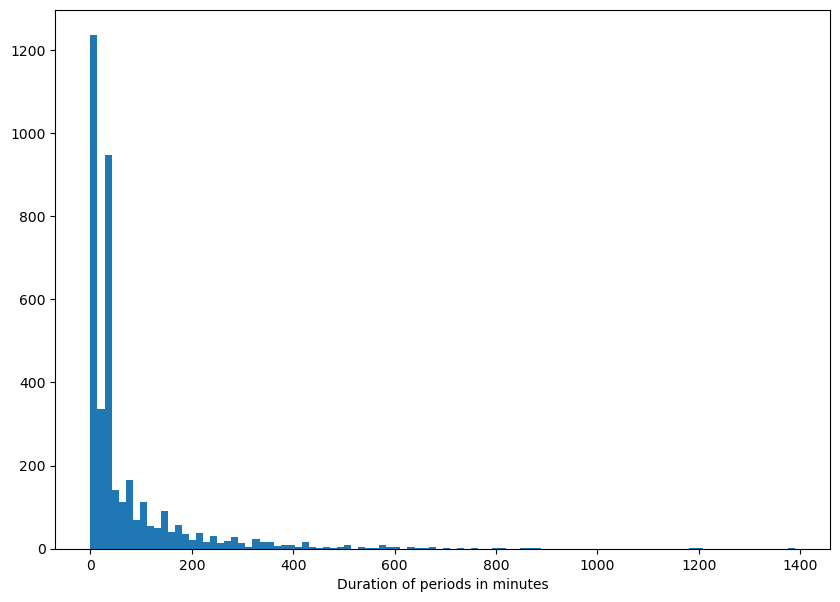

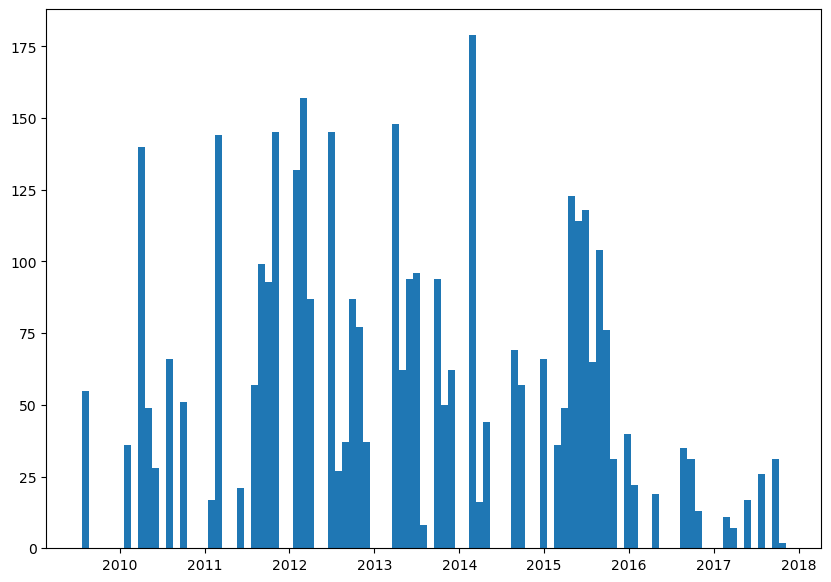

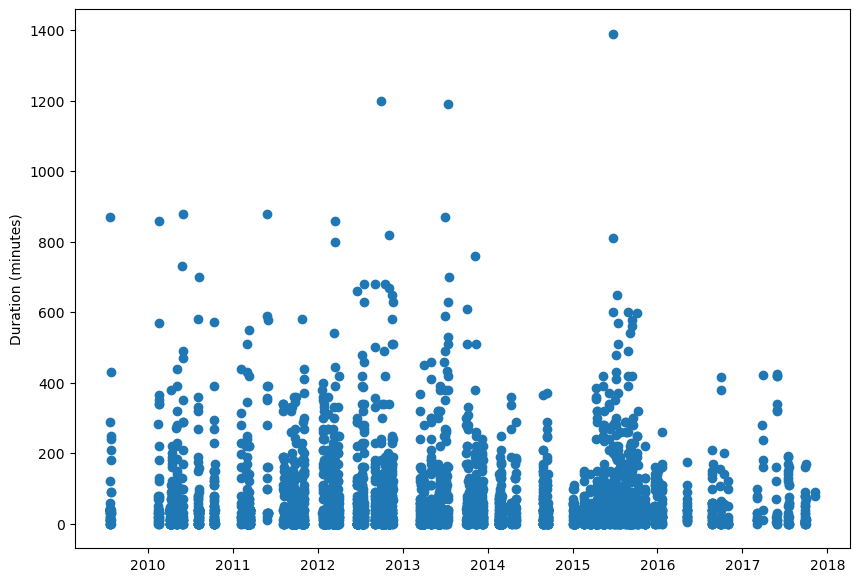

In [51]:
plt.figure(figsize=(10,7))
plt.hist(dates['duration'], bins=100)
plt.xlabel('Duration of periods in minutes')
plt.show()

plt.figure(figsize=(10,7))
plt.hist(dates['start'], bins=100)
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(dates['start'], dates['duration'])
plt.ylabel('Duration (minutes)')
plt.show()


In [52]:
ott = pd.read_feather('../data/supermag/OTT.feather')
ott.set_index('Date_UTC', inplace=True)

In [53]:
twins_periods = {}
i = 0
while i < len(dates):
	start = dates['start'][i]
	while dates['gap_in_minutes'][i] <= 60:
		i+=1
	end = dates['end'][i] + datetime.timedelta(minutes=15)
	period = [start, end]
	period = pd.DataFrame({'date':period})
	period['date'] = period['date'].dt.round('min')
	period.set_index('date', inplace=True)
	period = period.resample('1 min').bfill()
	twins_periods[f'period_{i}'] = period
	i+=1

In [54]:
def assigning_color(df):
	'''Making color columns.
		Inputs:
		df: dataframe to be analyzed
		station: station in question(will be looped over from list of stations) 
	'''

	# defining the threshold conditions
	conditions = [(df['dbht'] < 50),
					(df['dbht'] > 50) & (df['dbht'] < 100),
					(df['dbht'] > 100 ) & (df['dbht'] < 200),
					(df['dbht'] > 200)]

	direction = ['green', 'orange', 'red', 'black'] # quiver arrow colors assigned based on threshold conditions

	df['color'] = np.select(conditions, direction) # making the color column

	return df

In [55]:
def combining_mag_station_data(stations, twins_dict):

	combined_dict = {}
	for station in stations:
		station_dict = {}
		df = pd.read_feather(f'../data/supermag/{station}.feather')
		df = assigning_color(df)
		df.set_index('Date_UTC', inplace=True)
		for period in twins_periods.keys():
			df = period.join(df, how='left')
			if not df.isnull().all():
				station_dict[period] = df[['MLT', 'MLAT', 'dbht', 'color']]

		combined_dict[station] = station_dict
	
	return combined_dict

In [56]:
combined_dict = combining_mag_station_data(stations, twins_periods)

TypeError: str.join() takes no keyword arguments

In [ ]:
for k, period in enumerate(twins_periods.keys()):
	
	print(f'Beggining {period} out of {len(twins_periods.keys())}')
	stime = time.time()
	if not os.path.exists(f'plots/video_plots/twins_{period}'):
		os.makedirs(f'plots/video_plots/twins_{period}')

	for j in range(len(period)):
		fig = plt.figure(figsize=(10,7))
		plt.ylabel('MLAT')
		plt.xlabel('MLT')
		plt.ylim(-90, 90)
		plt.xlim(0,24)
		MLT, MLAT, dbht, colors = [], [], [], []
		for station in combined_dict.keys():
			try:
				if np.isnan(combined_dict[station][period]['MLT'][j]) or np.isnan(combined_dict[station][period]['MLT'][j]):
					continue
				MLT.append(combined_dict[station][period]['MLT'][j])
				MLAT.append(combined_dict[station][period]['MLAT'][j])
				dbht.append(combined_dict[station][period]['dbht'][j])
				colors.append(combined_dict[station][period]['color'][j])
				
			except KeyError:
				continue
		plt.title(combined_dict['OTT'][period].index[j])
		plt.scatter(x=MLT, y=MLAT, color=colors, s=dbht)

		plt.savefig(f'plots/video_plots/twins_{period}/figure_{j}.png')
		plt.close()


	fps=10
	image_folder = f'plots/video_plots/twins_{period}'
	image_files = [os.path.join(image_folder,img)
				for img in os.listdir(image_folder)
				if img.endswith('.png')]
	clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(natsorted(image_files), fps=fps)
	clip.write_videofile(f'plots/videos/twins_{period}.mp4', logger=None)
print(f'Finished {period}. Time: {((time.time()-stime)/60):2f} minutes')


Beggining period_0 out of 3802
Finished period_0. Time: 7.396392 minutes
Beggining period_1 out of 3802
Finished period_1. Time: 7.327058 minutes
Beggining period_2 out of 3802
Finished period_2. Time: 7.166882 minutes
Beggining period_3 out of 3802
Finished period_3. Time: 7.039076 minutes
Beggining period_4 out of 3802
Finished period_4. Time: 7.172198 minutes
Beggining period_5 out of 3802
Finished period_5. Time: 7.150914 minutes
Beggining period_6 out of 3802
Finished period_6. Time: 7.117816 minutes
Beggining period_7 out of 3802
Finished period_7. Time: 7.122466 minutes
Beggining period_8 out of 3802
Finished period_8. Time: 7.108946 minutes
Beggining period_9 out of 3802
Finished period_9. Time: 7.105288 minutes
Beggining period_10 out of 3802
Finished period_10. Time: 7.138505 minutes
Beggining period_11 out of 3802
Finished period_11. Time: 7.151998 minutes
Beggining period_12 out of 3802
Finished period_12. Time: 7.434234 minutes
Beggining period_13 out of 3802
Finished peri

KeyboardInterrupt: 

In [ ]:

# i = 2
# MLT, MLAT, dE, dN, colors = [], [], [], [], []
# for station in dict.keys():
# 	if np.isnan(dict[station]['MLT'][i]) or np.isnan(dict[station]['MLT'][i]) or np.isnan(dict[station]['dE'][i]) or np.isnan(dict[station]['dN'][i]):
# 		continue
# 	MLT.append(dict[station]['MLT'][i])
# 	MLAT.append(dict[station]['MLAT'][i])
# 	dE.append(dict[station]['dE'][i])
# 	dN.append(dict[station]['dN'][i])
# 	colors.append(dict[station]['color'][i])
# 	if dict[station]['color'][i] == '0':
# 		print(dict[station])

# print(colors)

# scale = 2*(np.amax([np.amax(dE), np.amax(dN)]))

# plt.figure(figsize=(10,7))
# Q = plt.quiver(MLT, MLAT, dE/scale, dN/scale, angles='uv', pivot='tail', color=colors, scale=1)
# plt.quiverkey(Q, 0.2, -0.05, 0.05, label = '<50 nT/min', color='green', labelpos='E')
# plt.quiverkey(Q, 0.6, -0.05, 0.05, label = '50-100 nT/min', color='orange', labelpos='E')
# plt.quiverkey(Q, 0.2, -0.1, 0.05, label = '100-200 nT/min', color='red', labelpos='E')
# plt.quiverkey(Q, 0.6, -0.1, 0.05, label = '>200 nT/min', color='black', labelpos='E')
# plt.tick_params(axis='x')
# plt.tick_params(axis='y')

# plt.show()

/tmp/ipykernel_773758/2728079766.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,7))


Moviepy - Building video plots/videos/twins_period_0.mp4.
Moviepy - Writing video plots/videos/twins_period_0.mp4



Moviepy - Done !
Moviepy - video ready plots/videos/twins_period_0.mp4


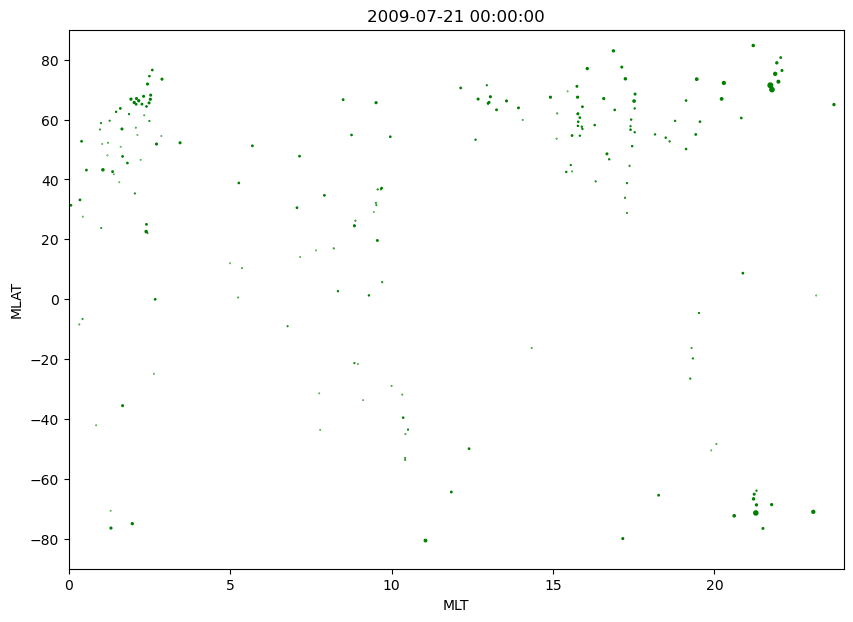

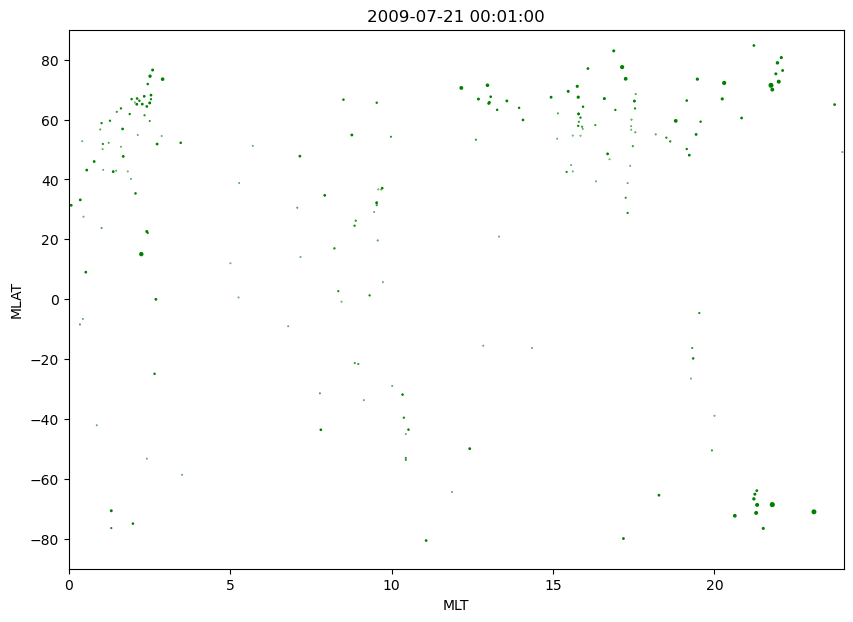

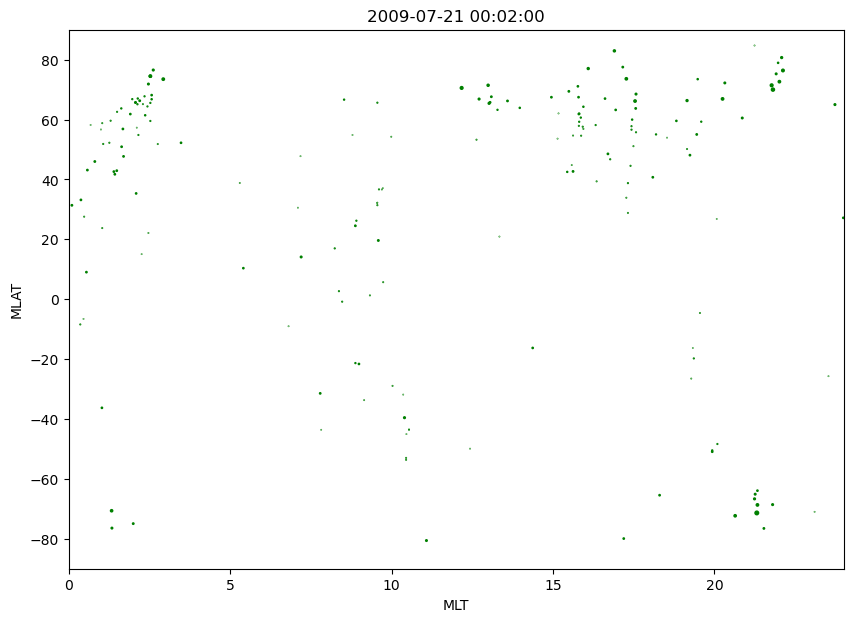

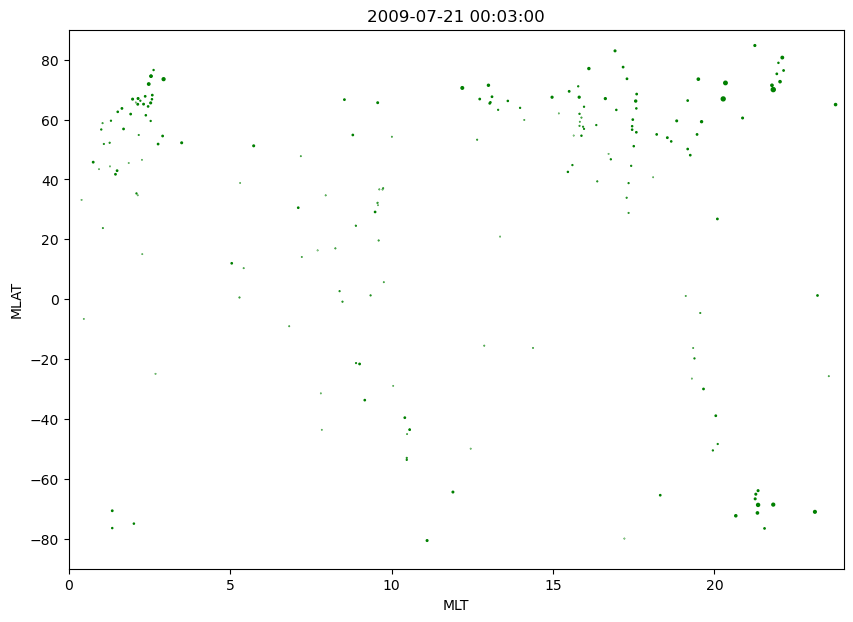

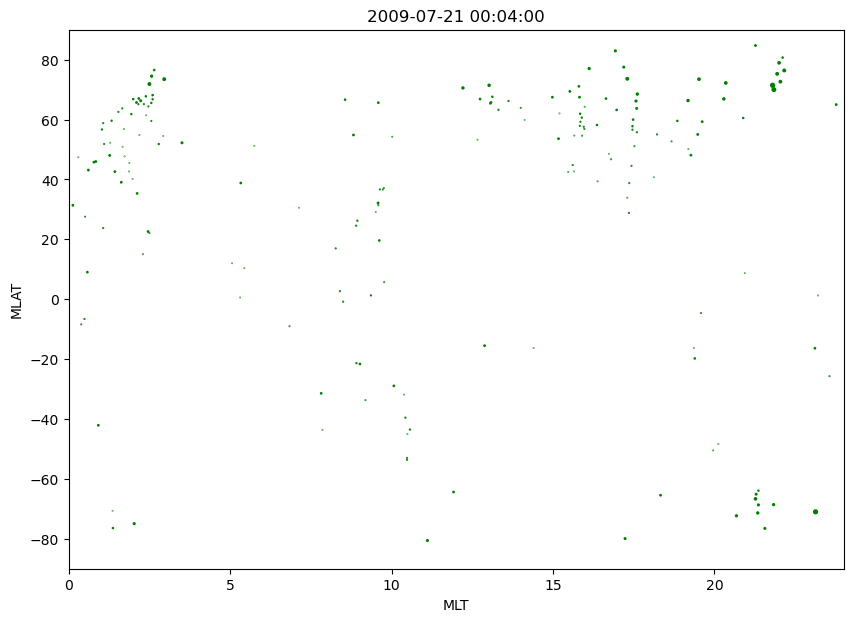

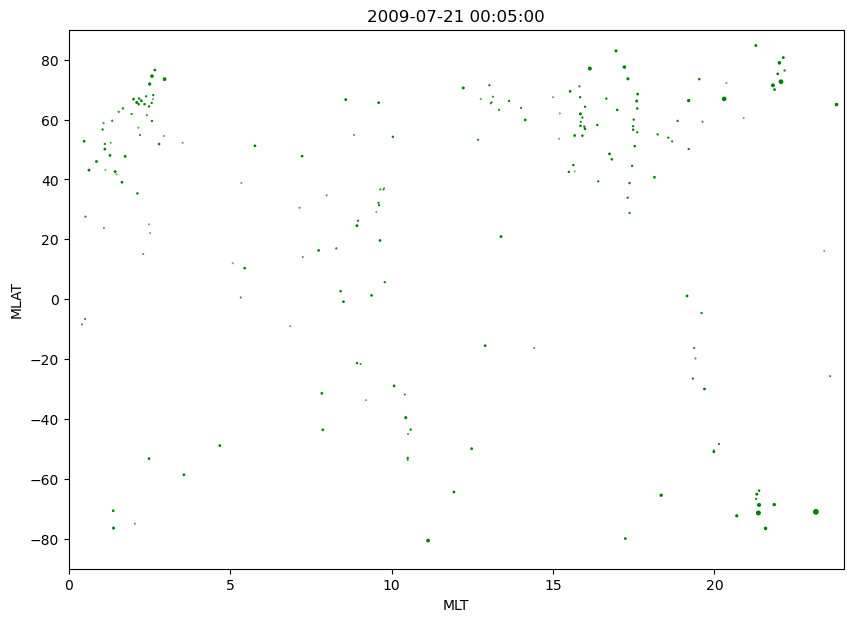

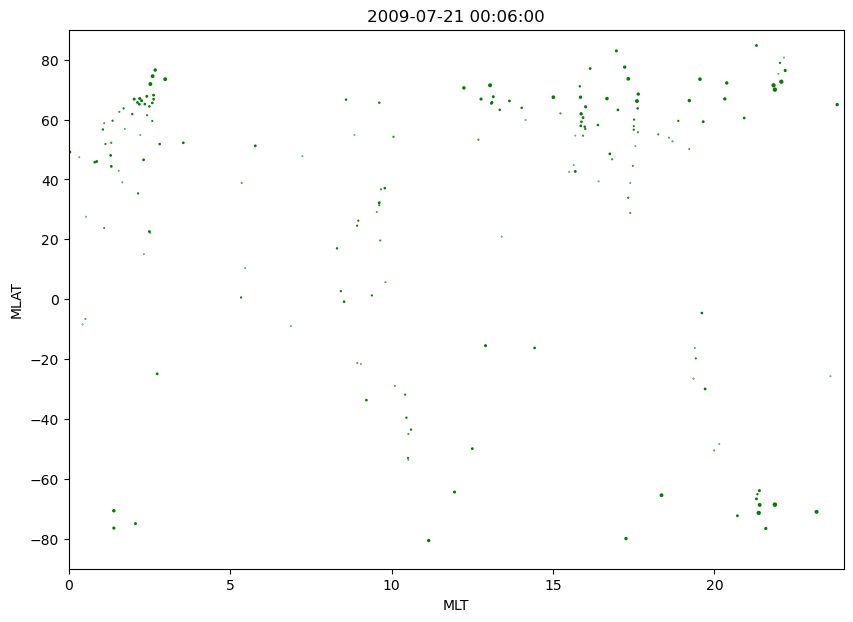

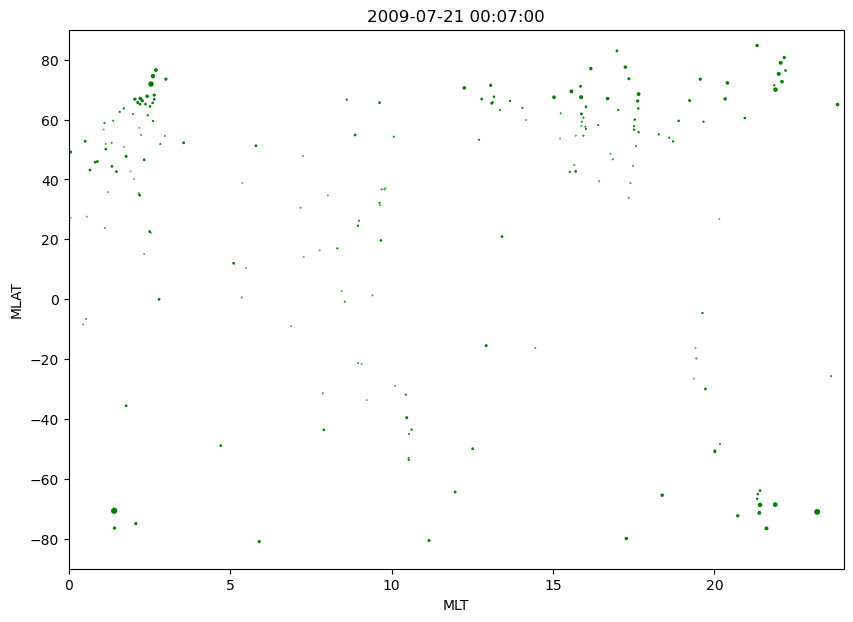

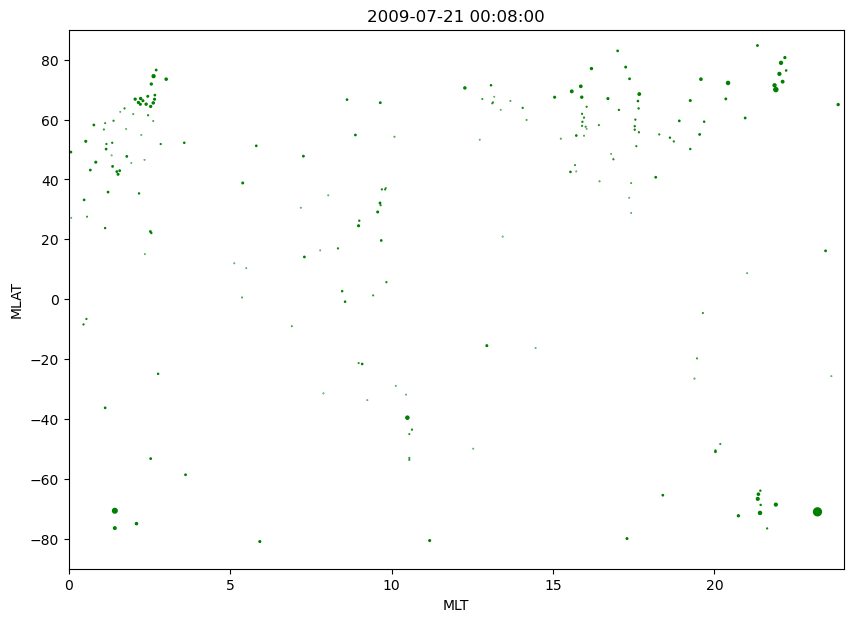

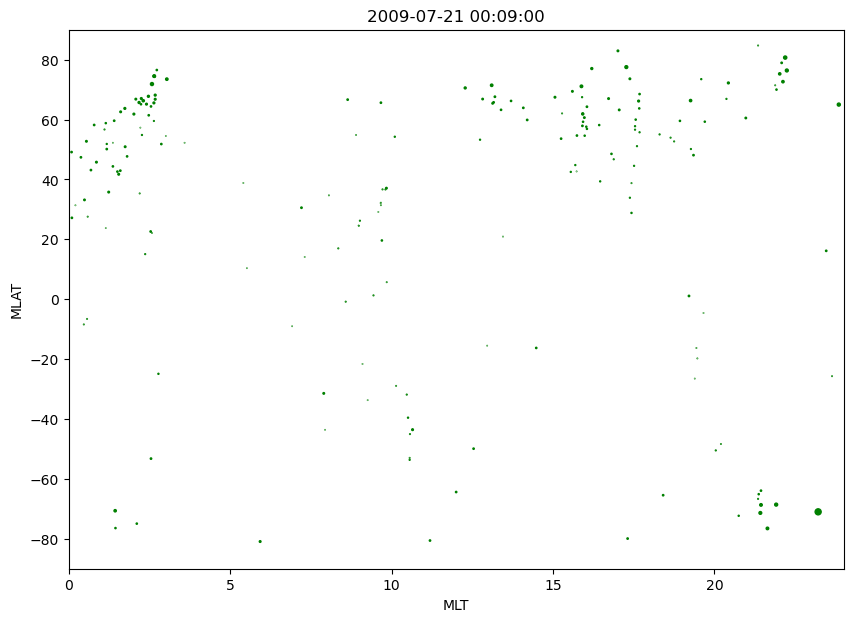

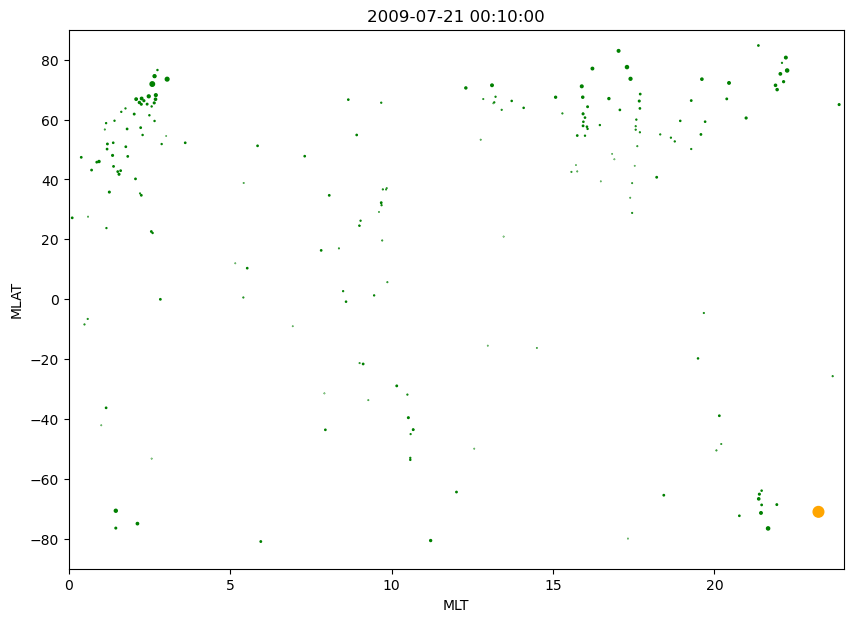

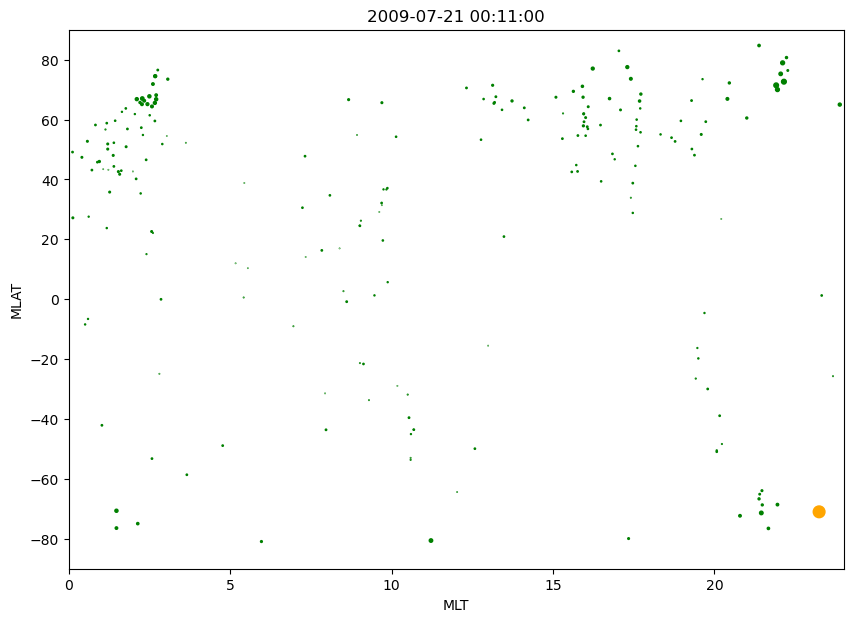

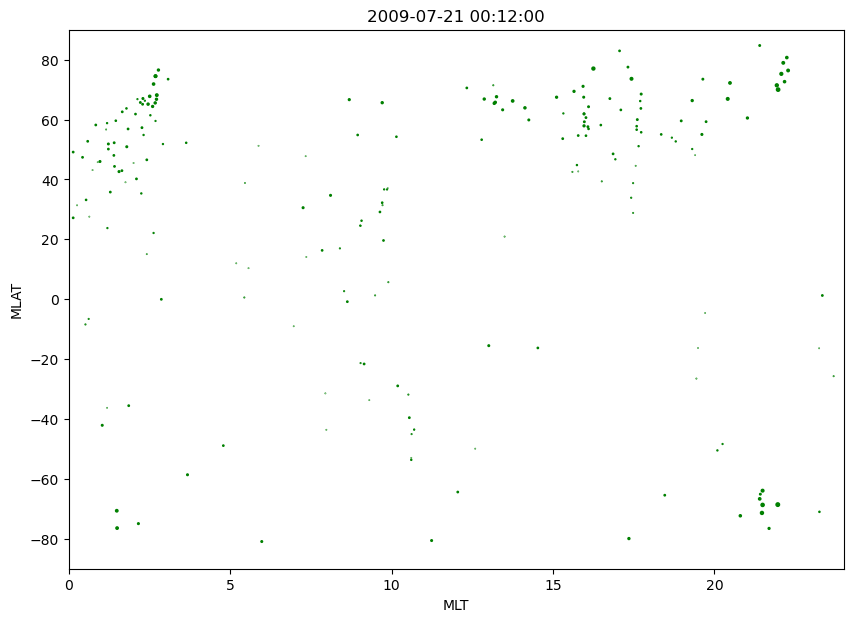

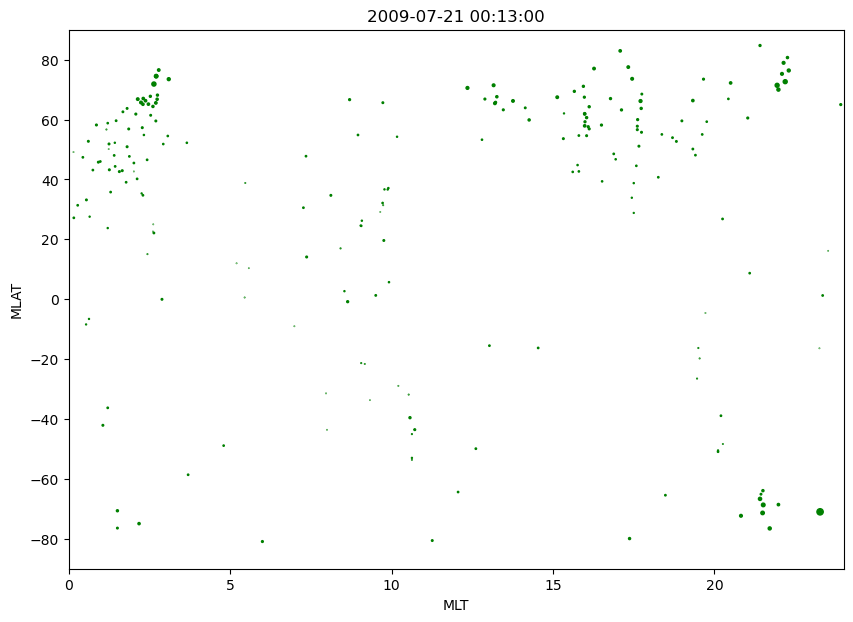

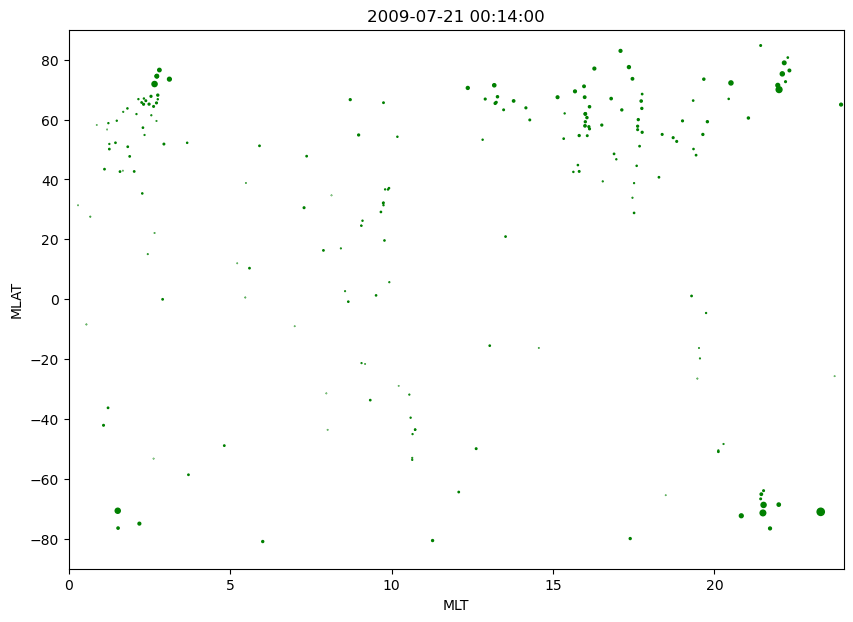

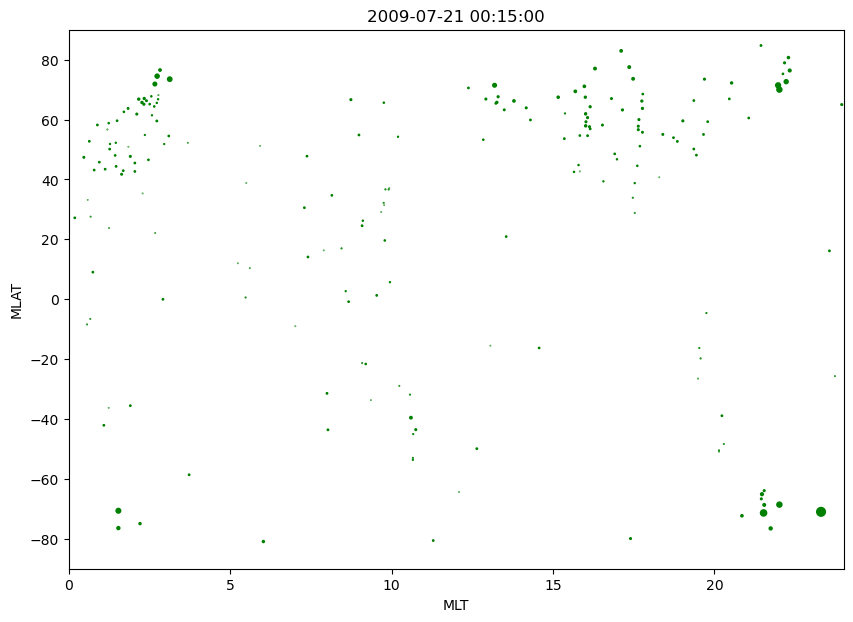

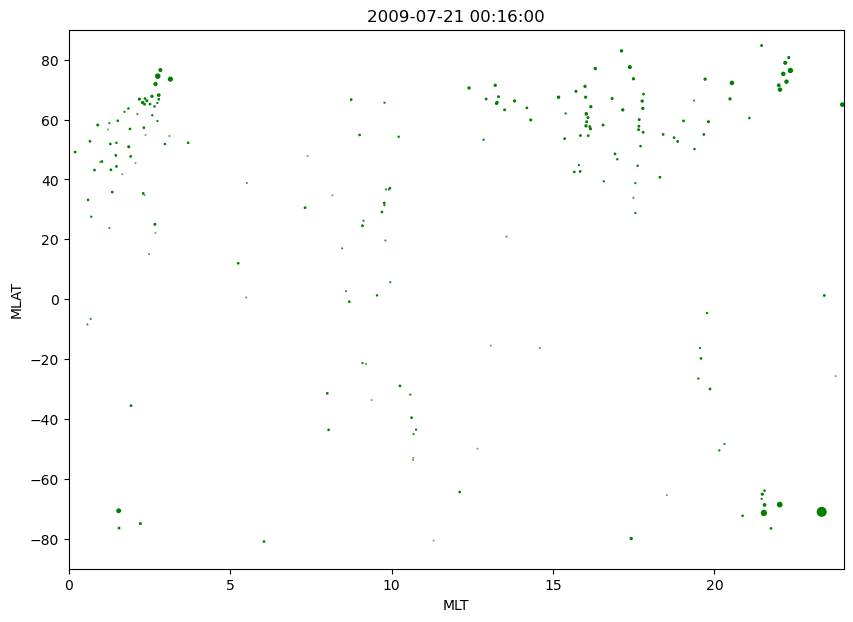

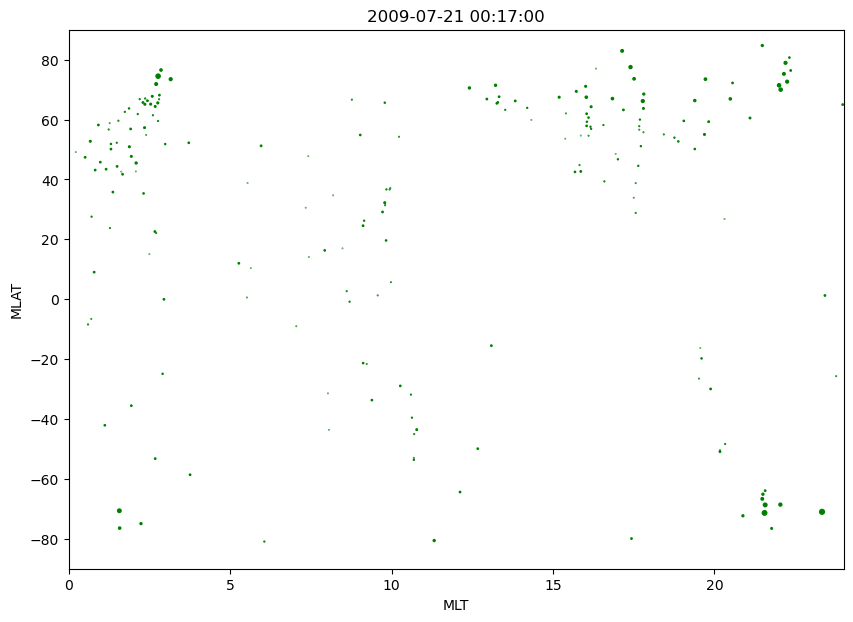

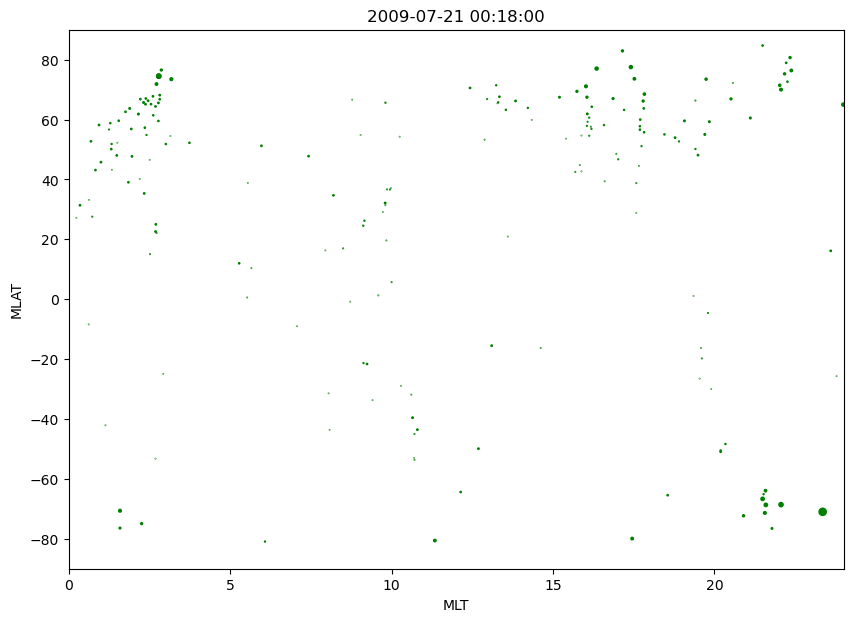

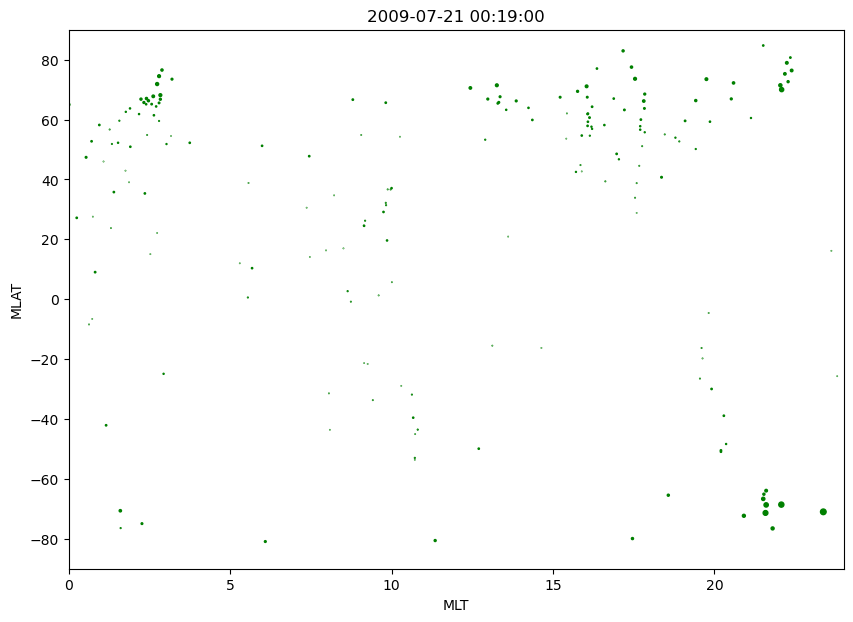

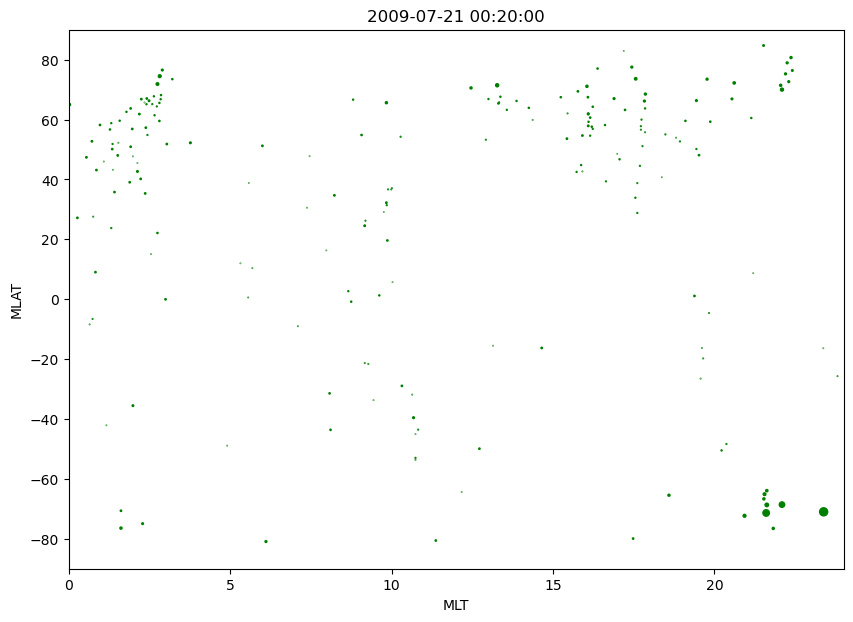

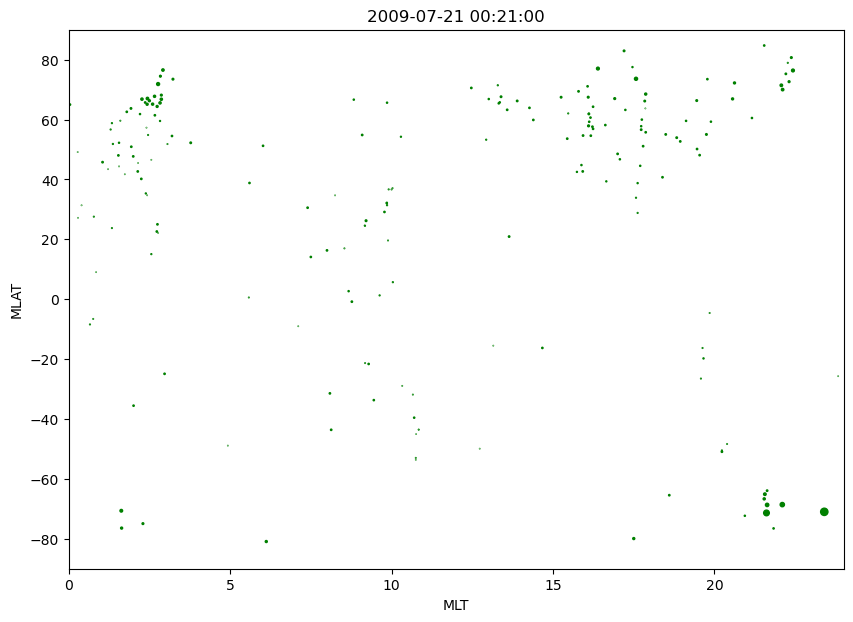

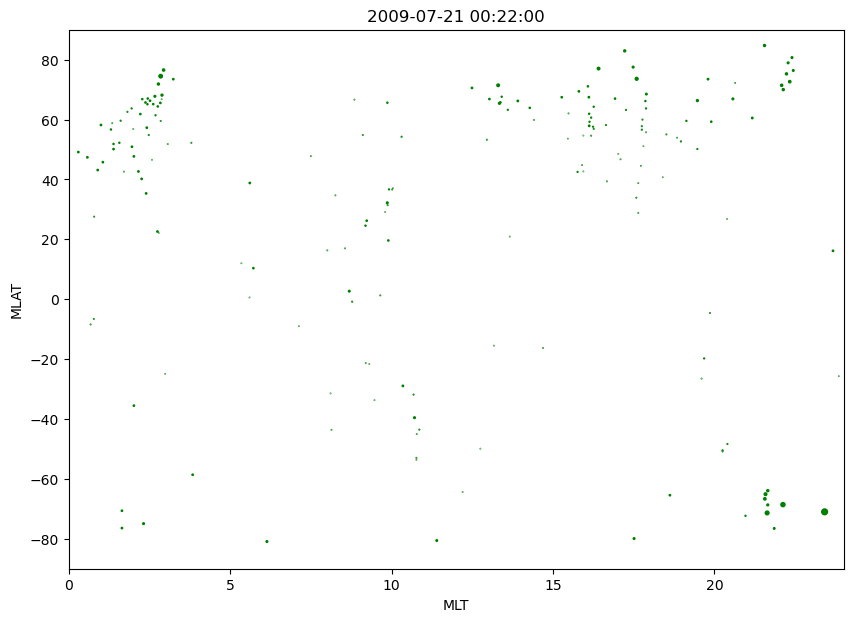

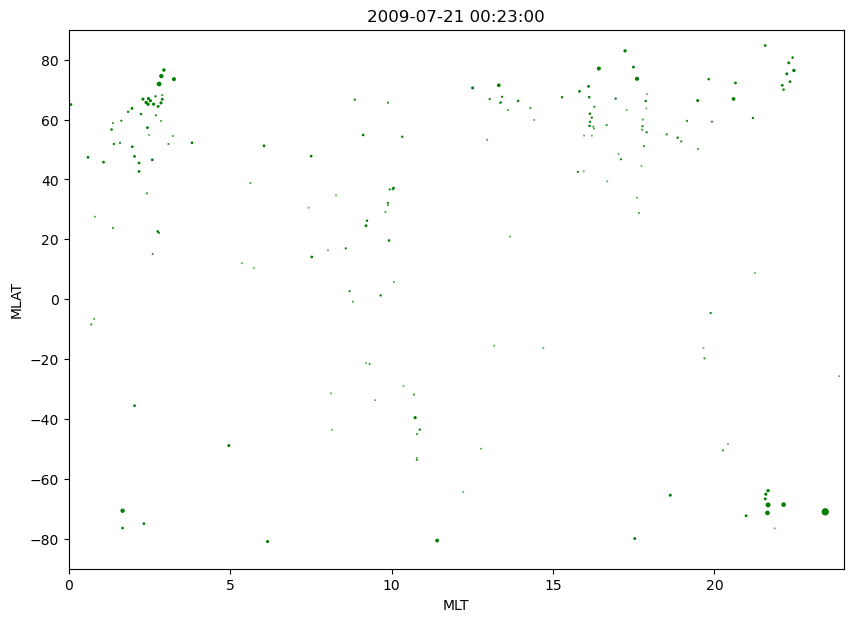

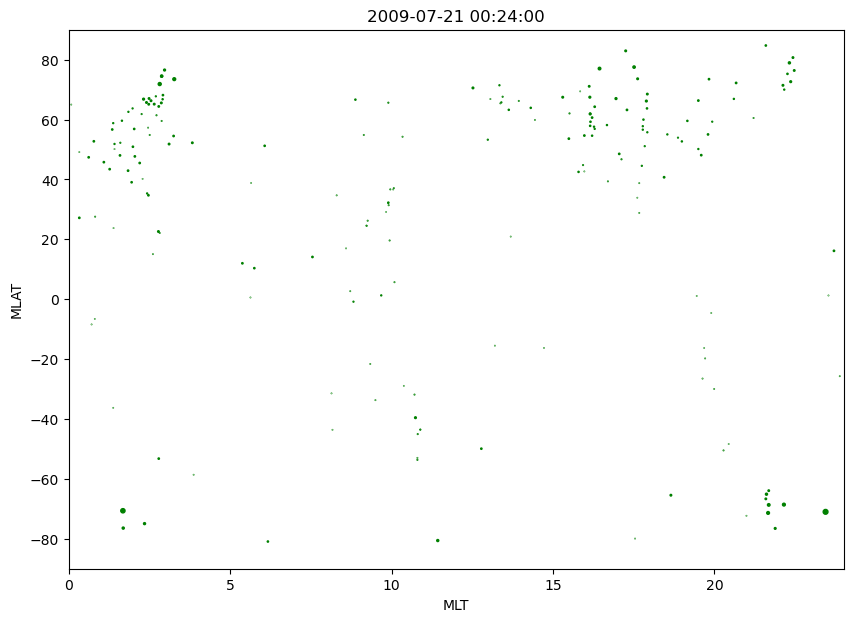

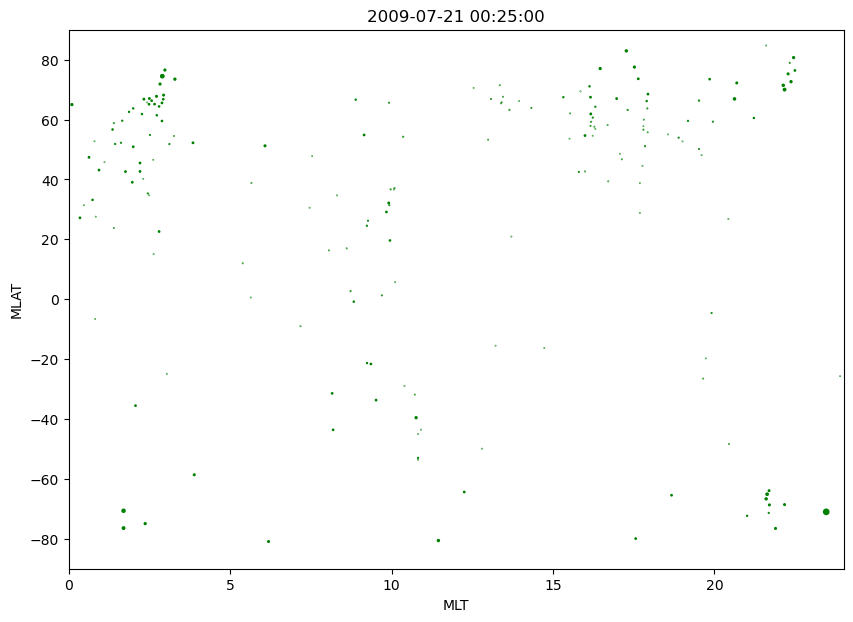

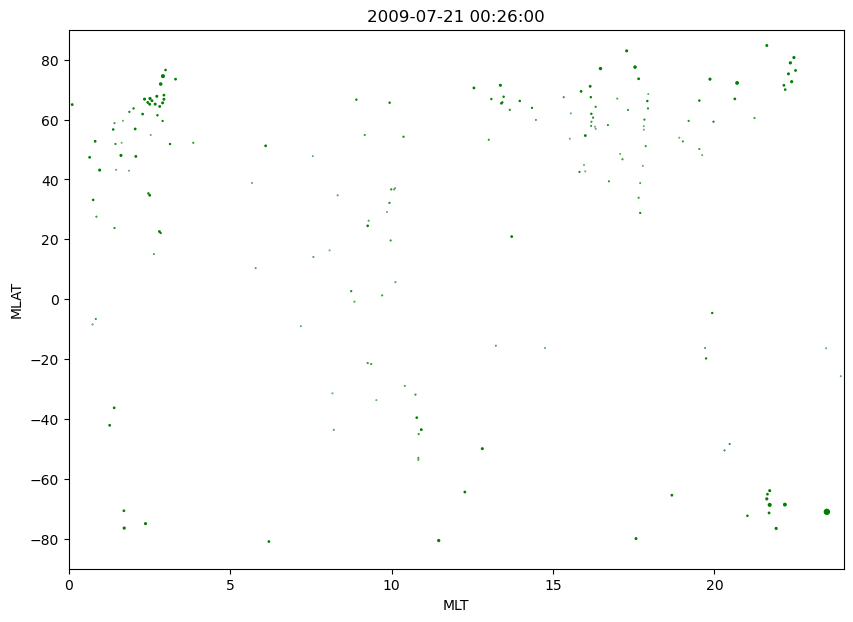

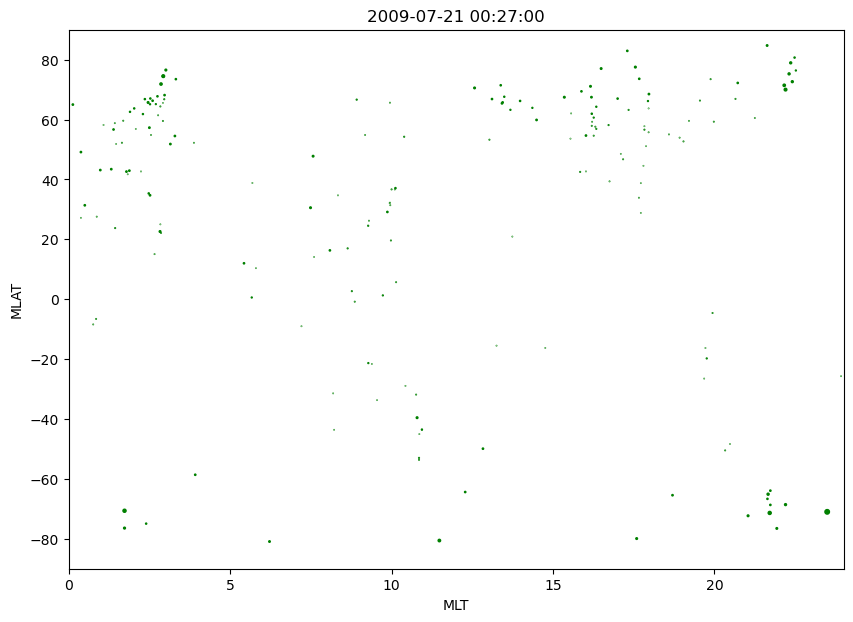

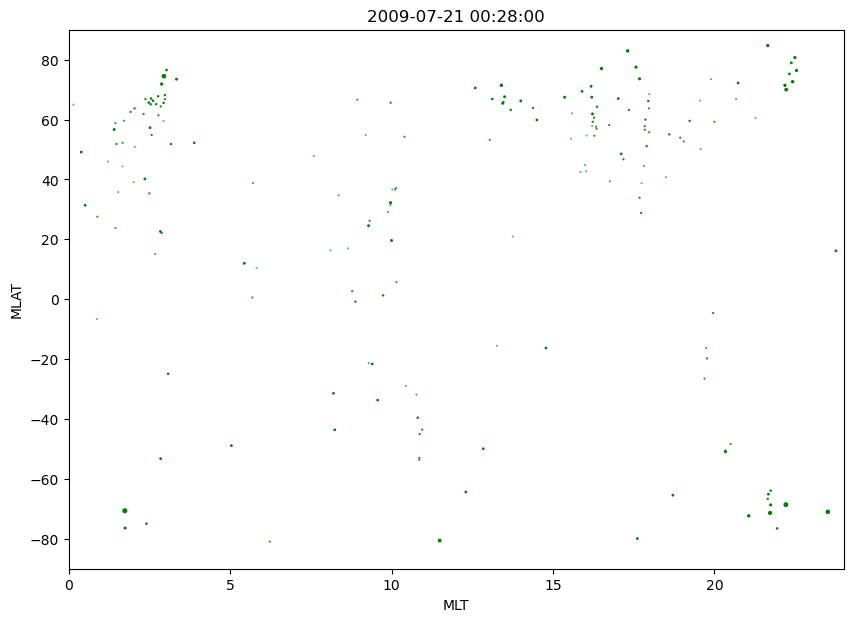

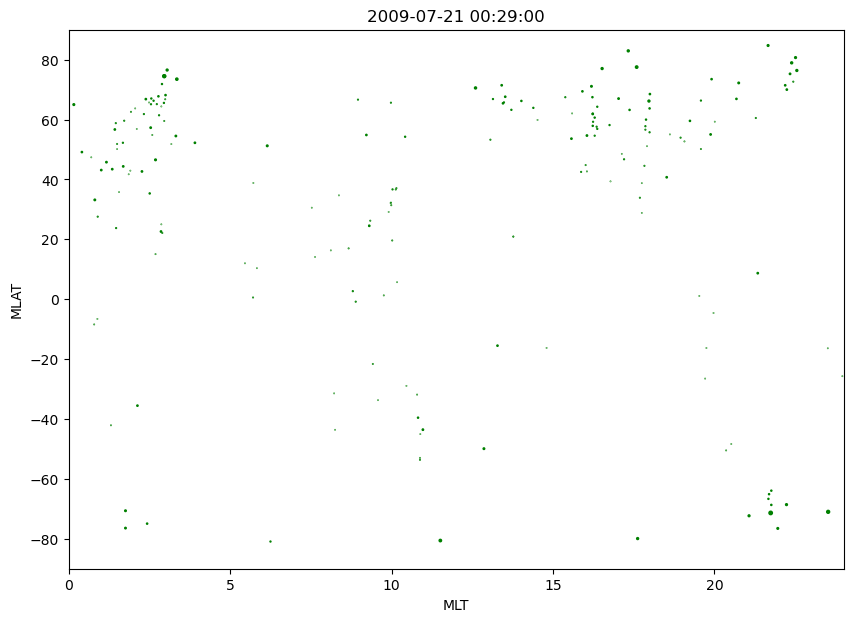

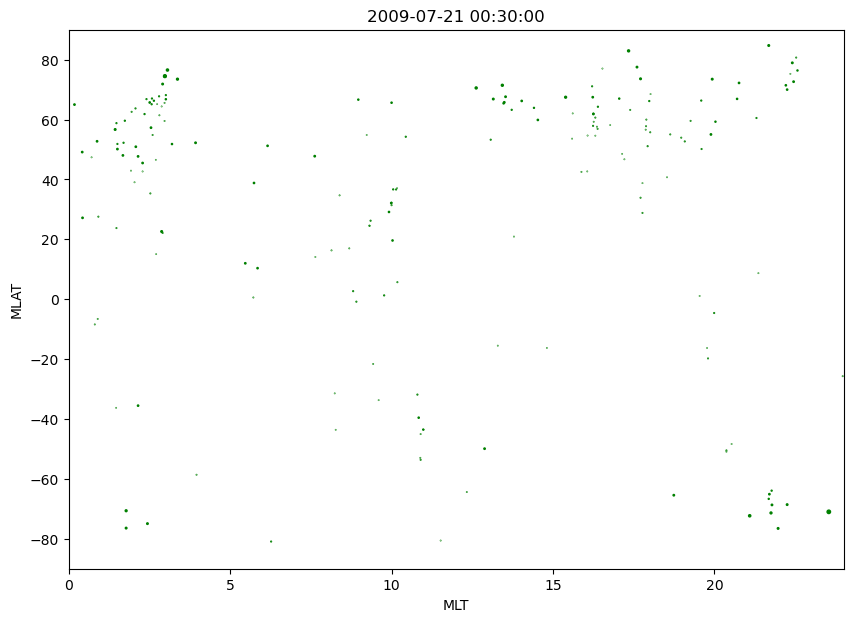

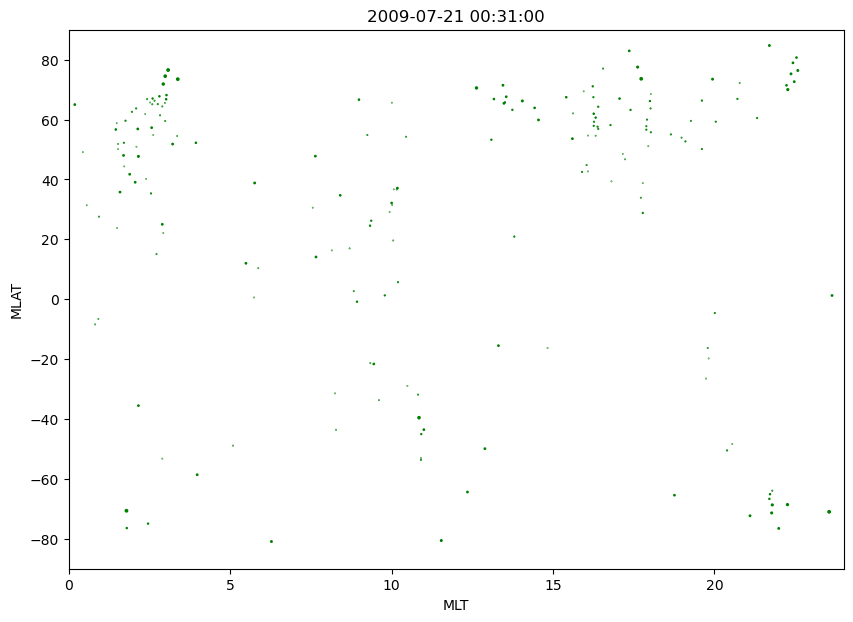

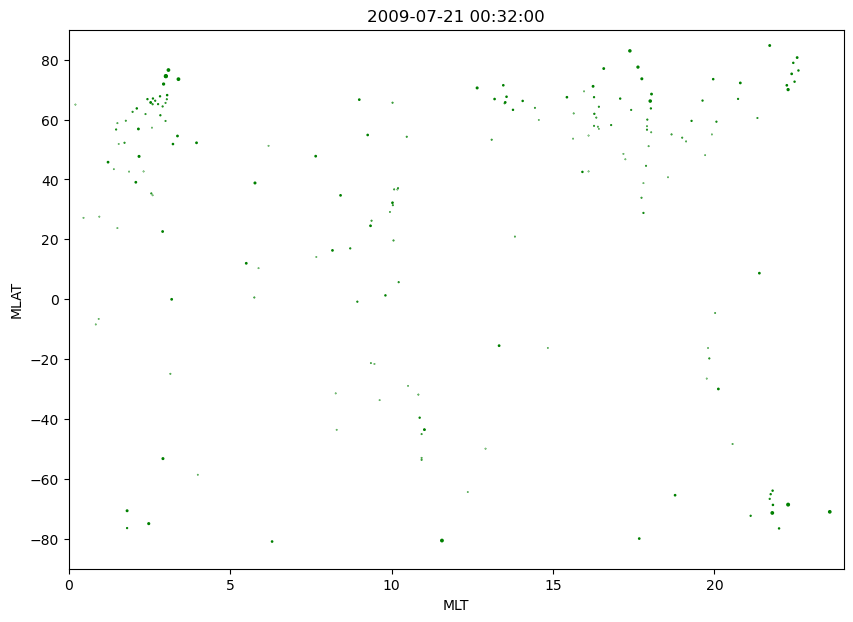

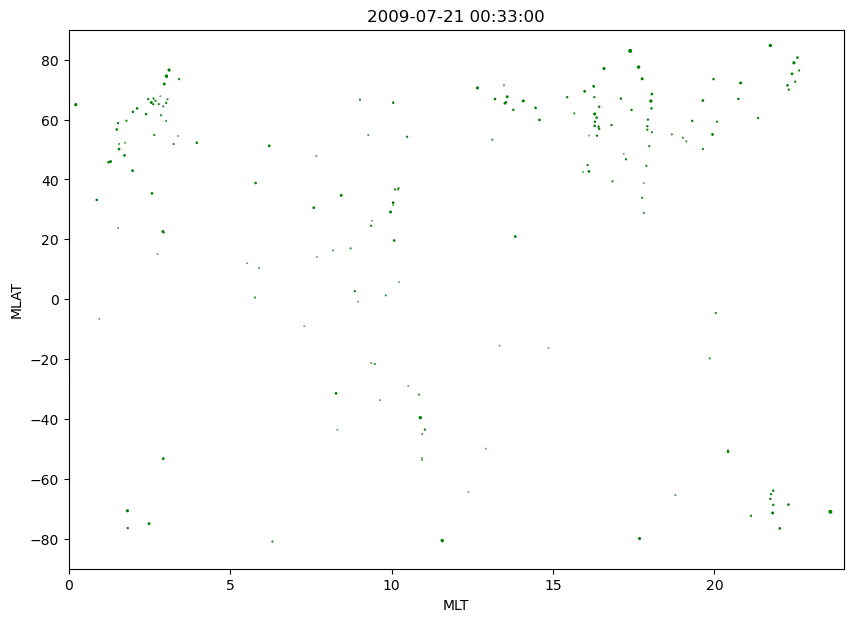

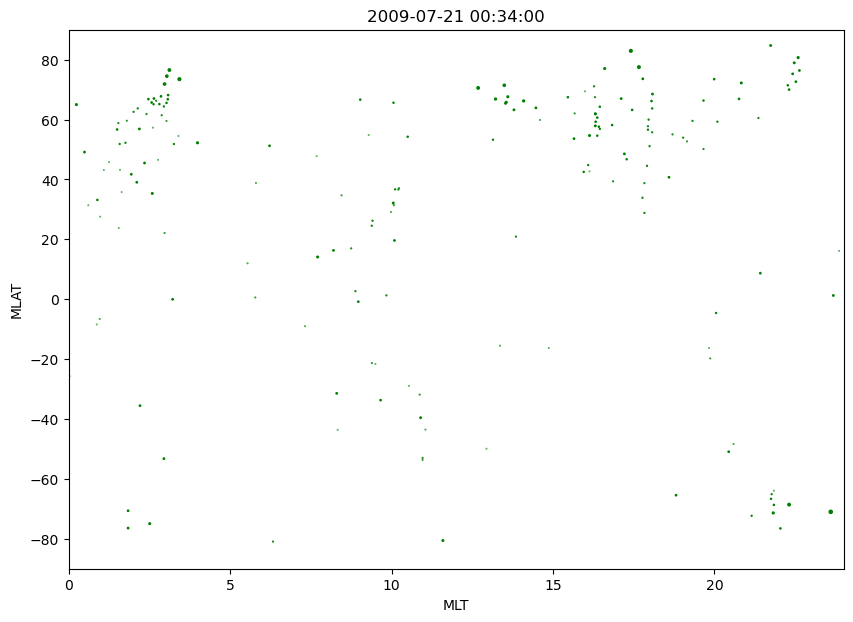

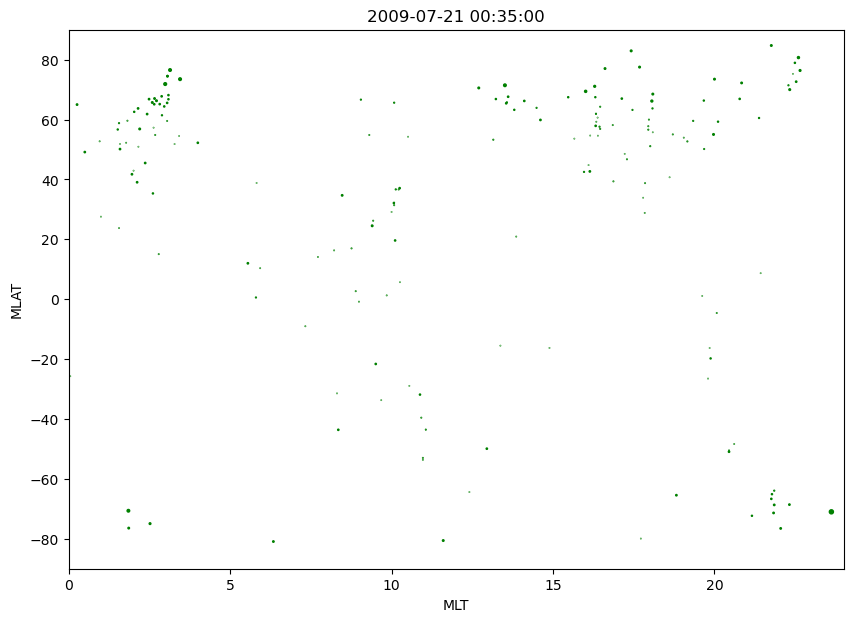

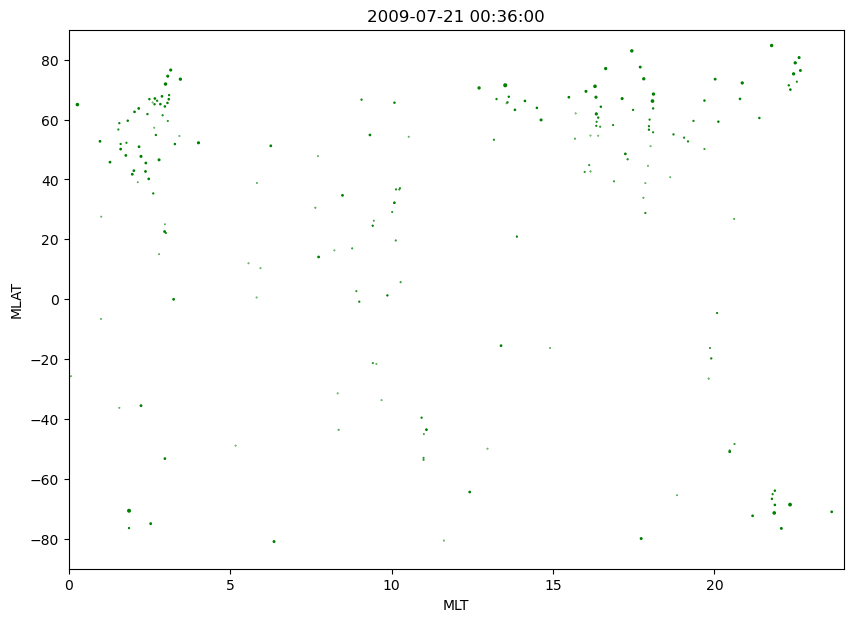

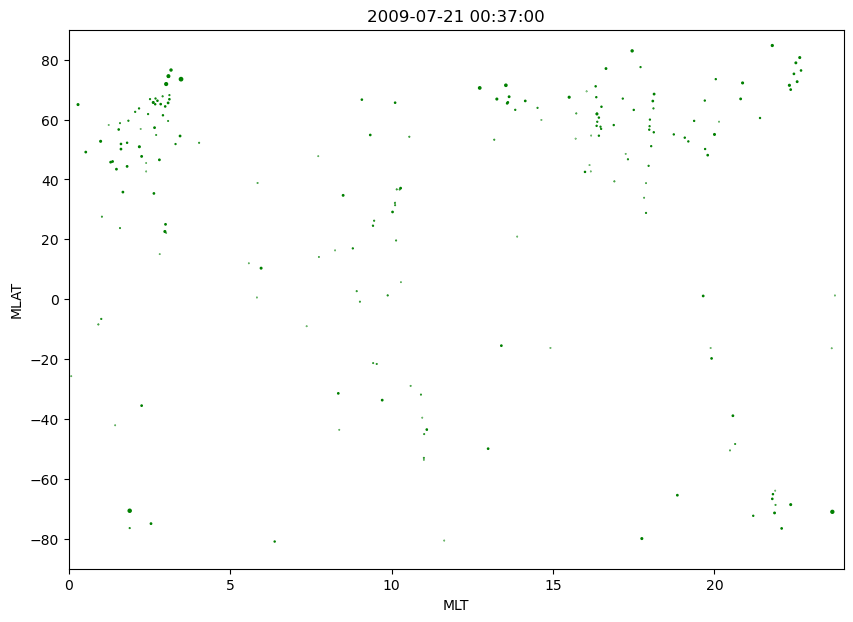

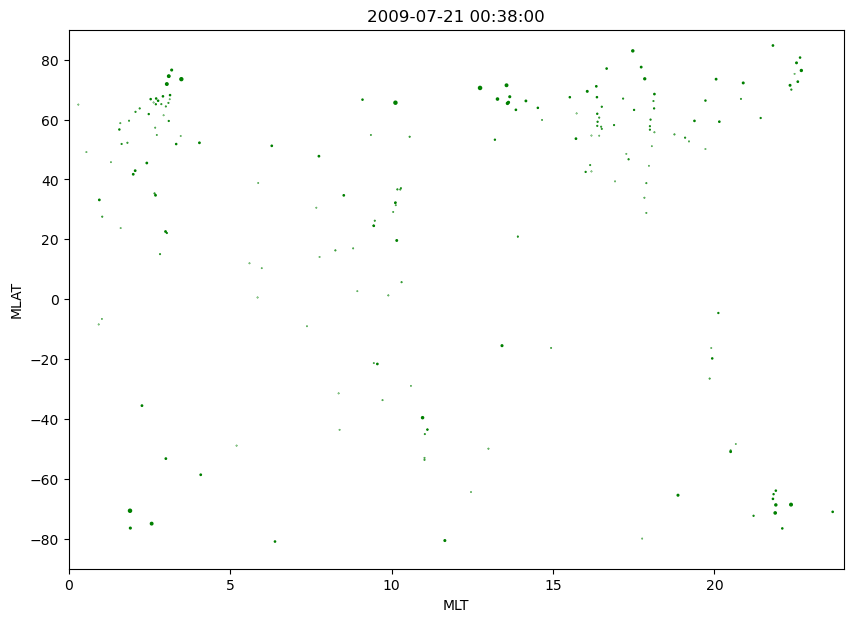

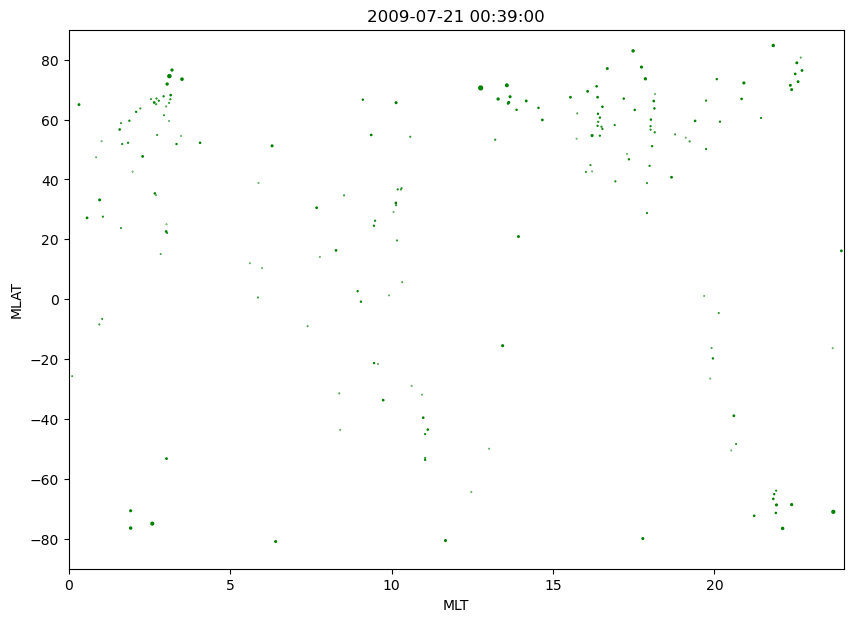

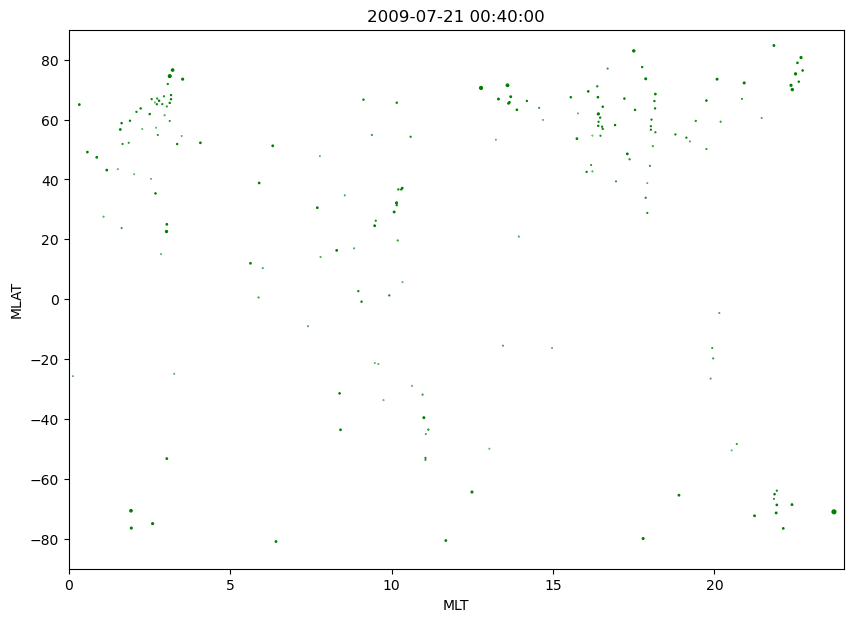

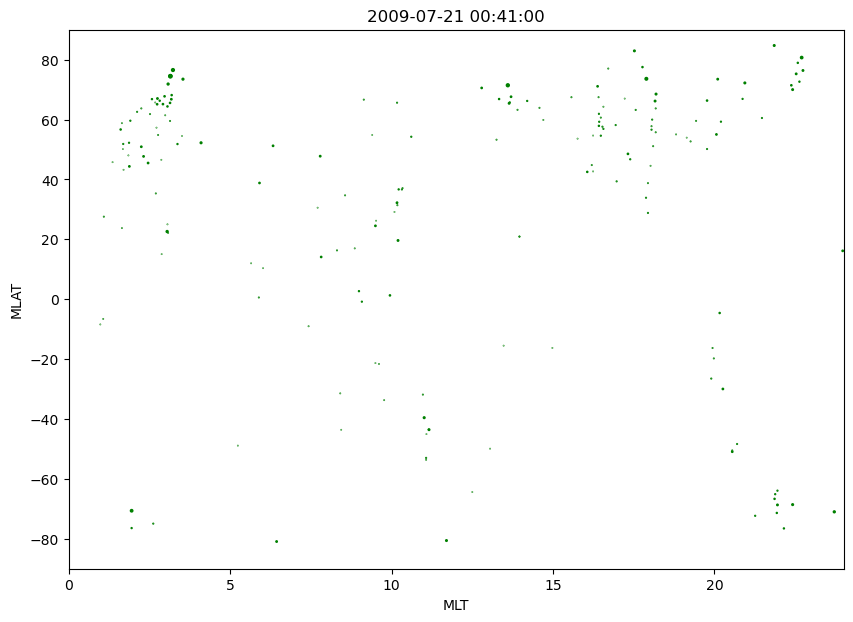

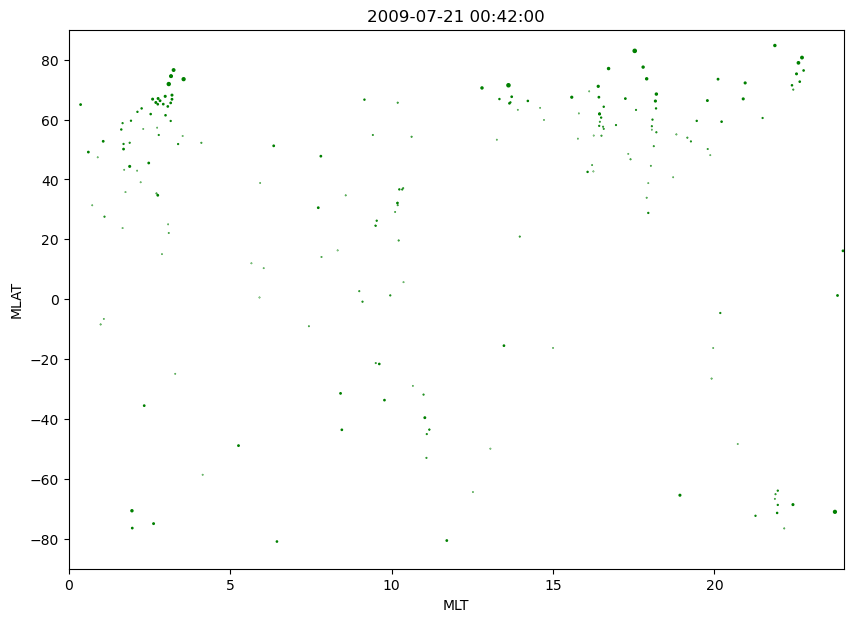

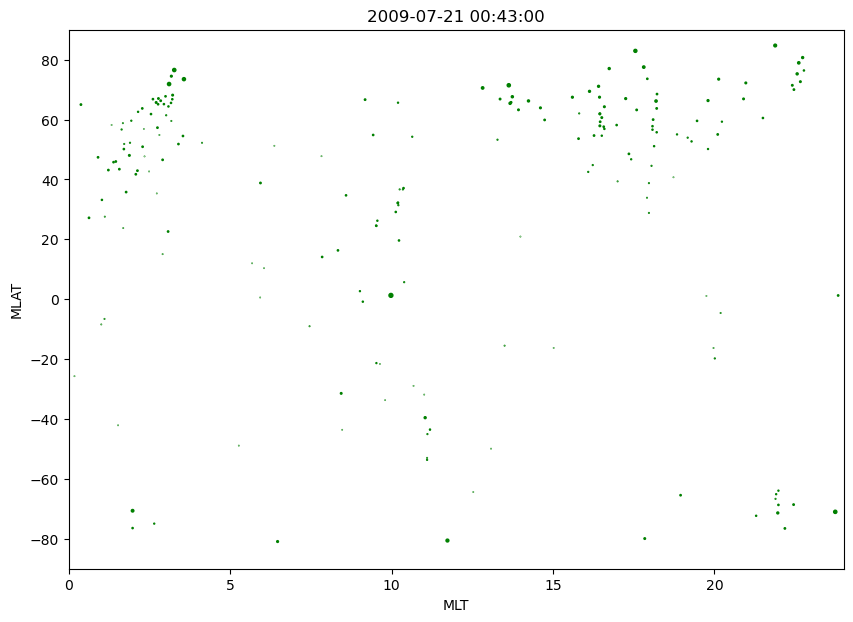

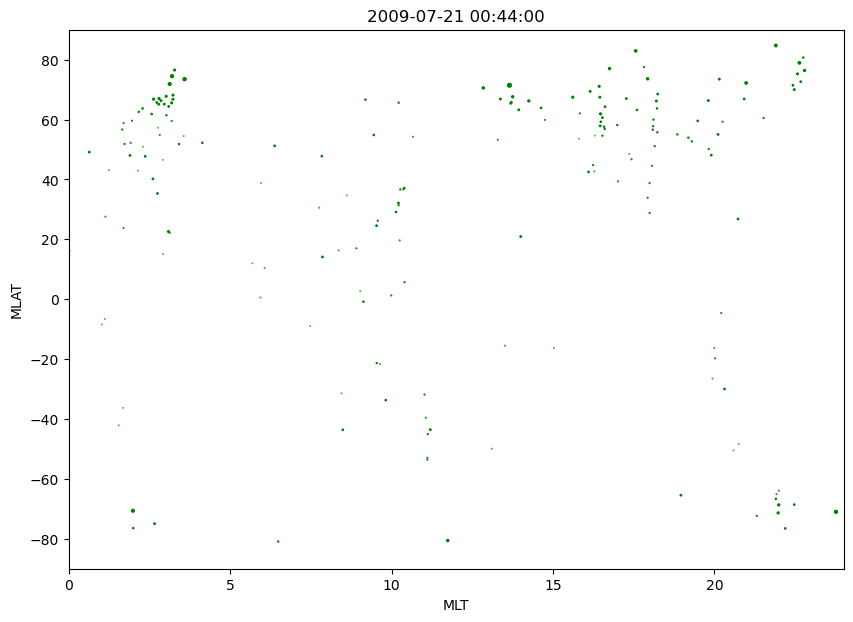

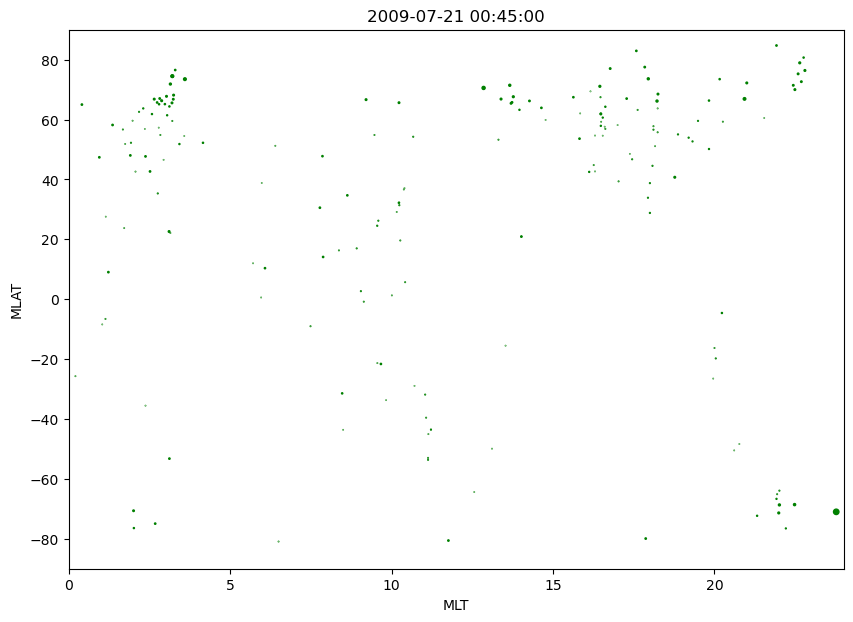

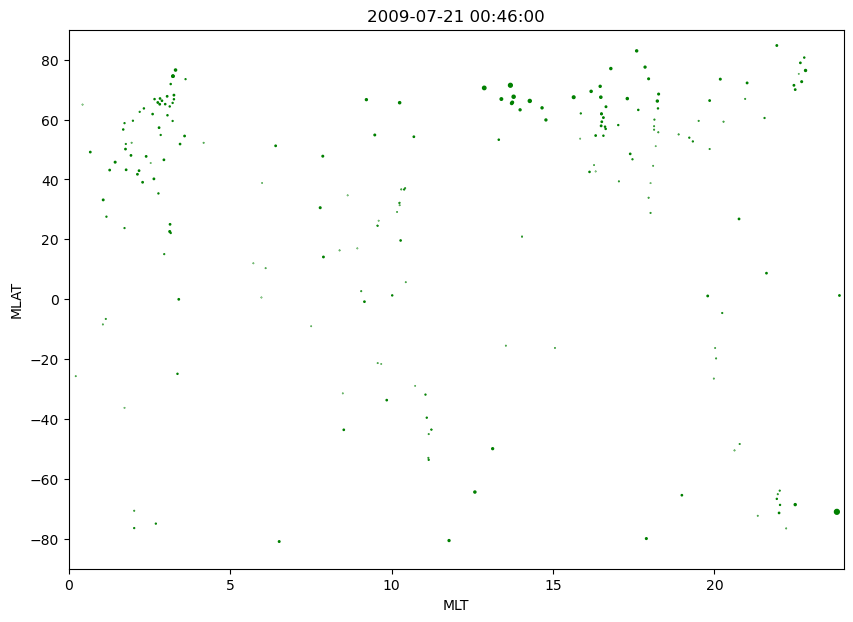

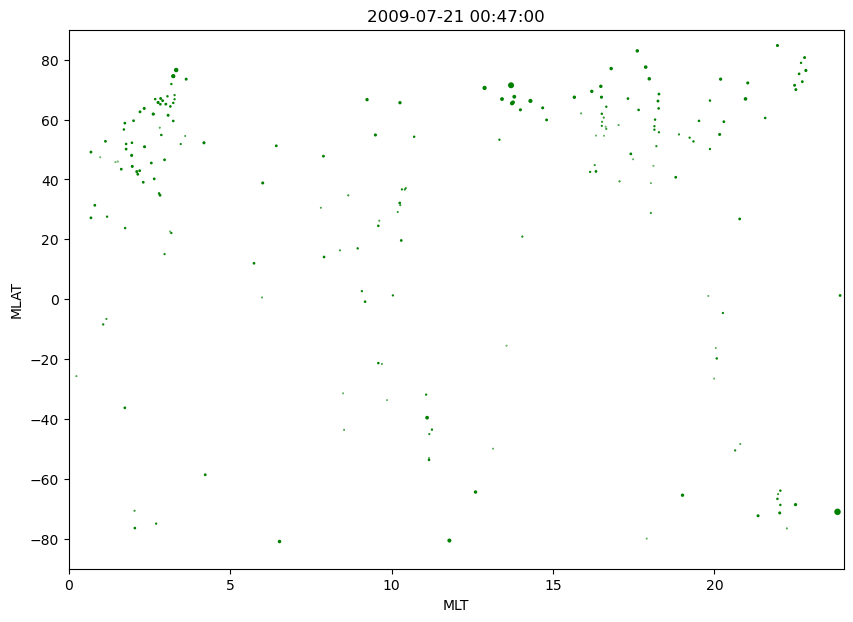

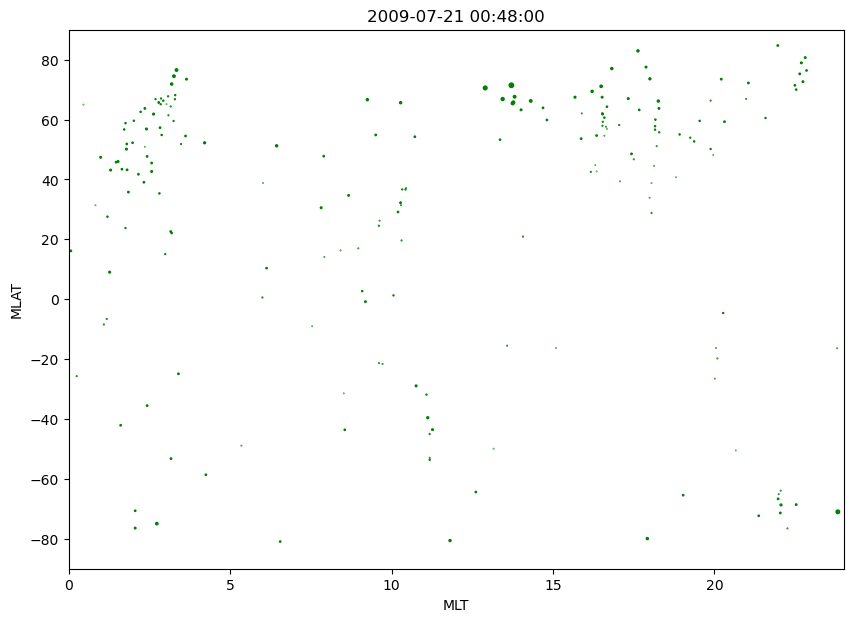

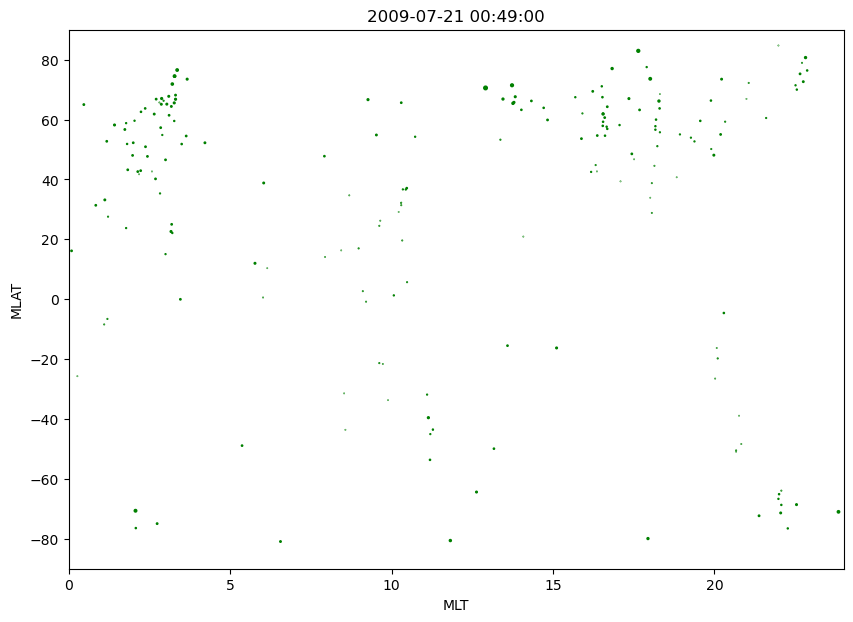

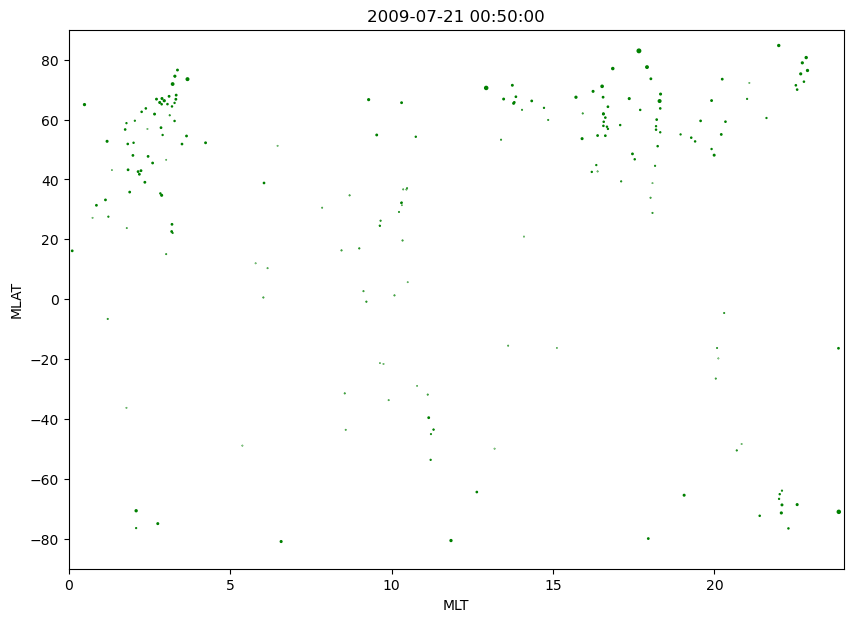

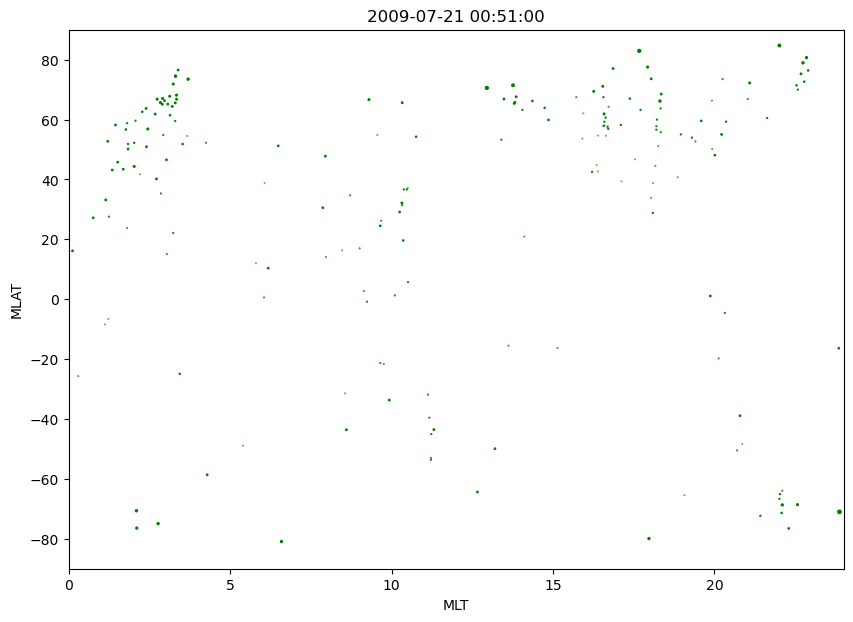

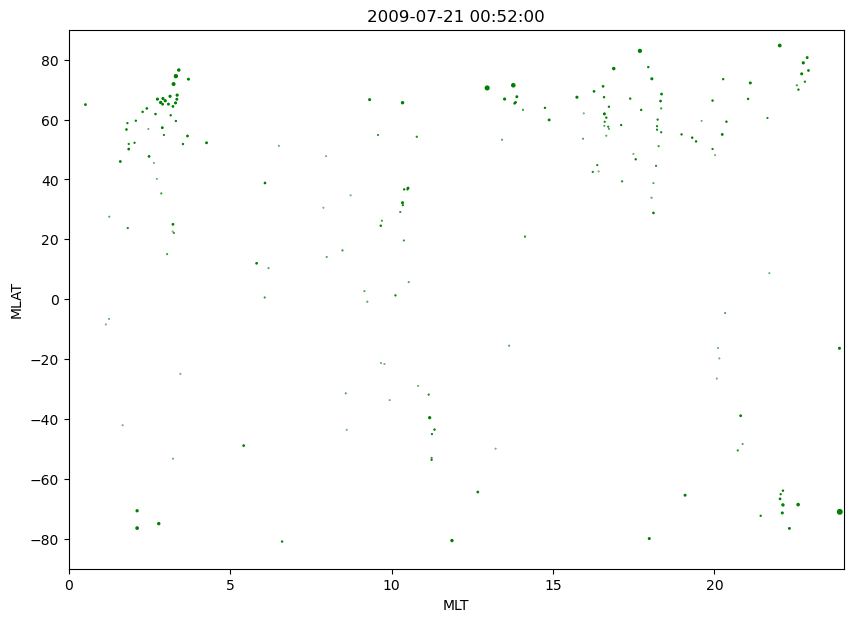

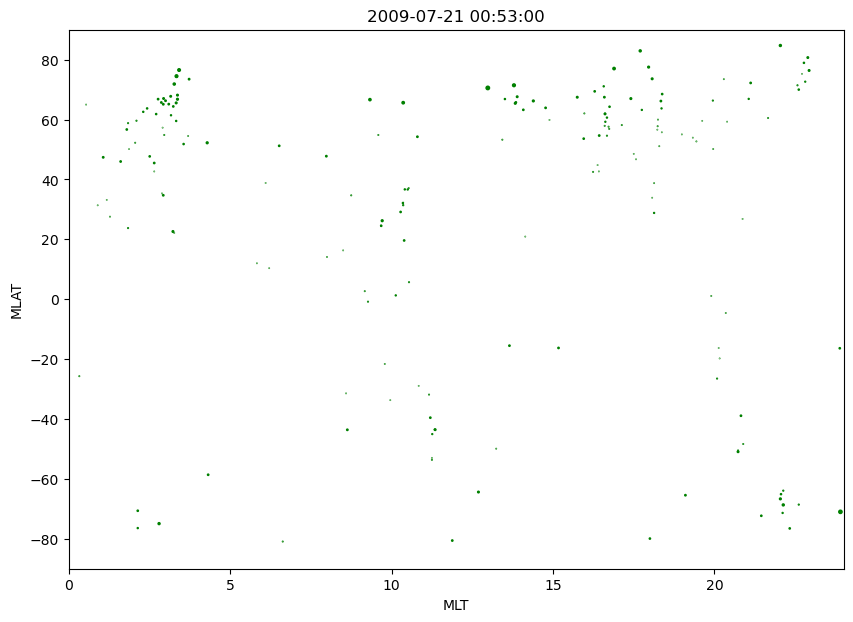

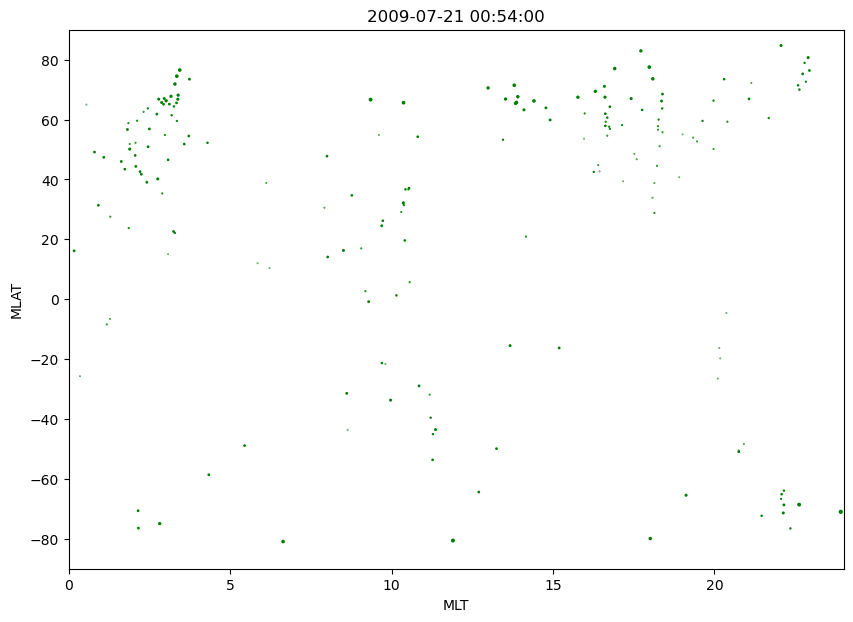

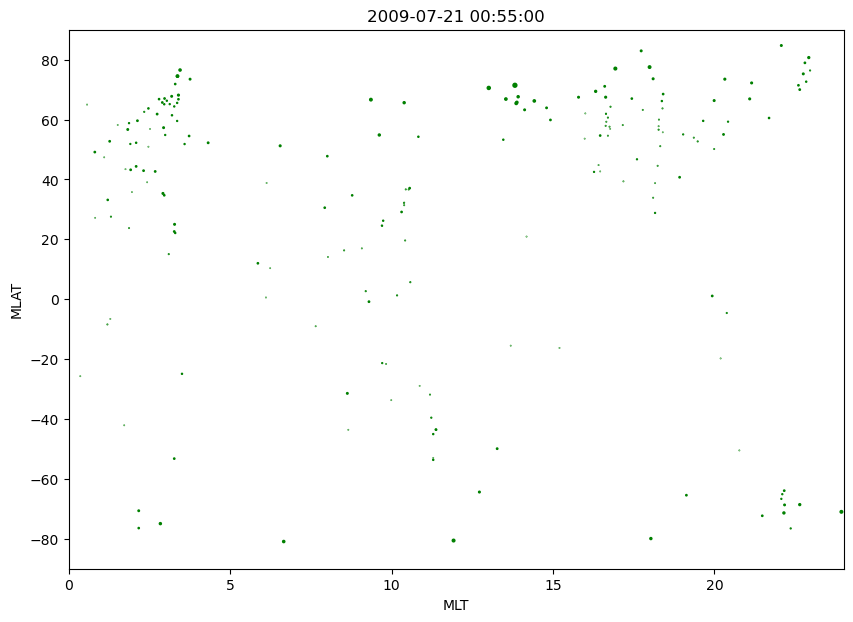

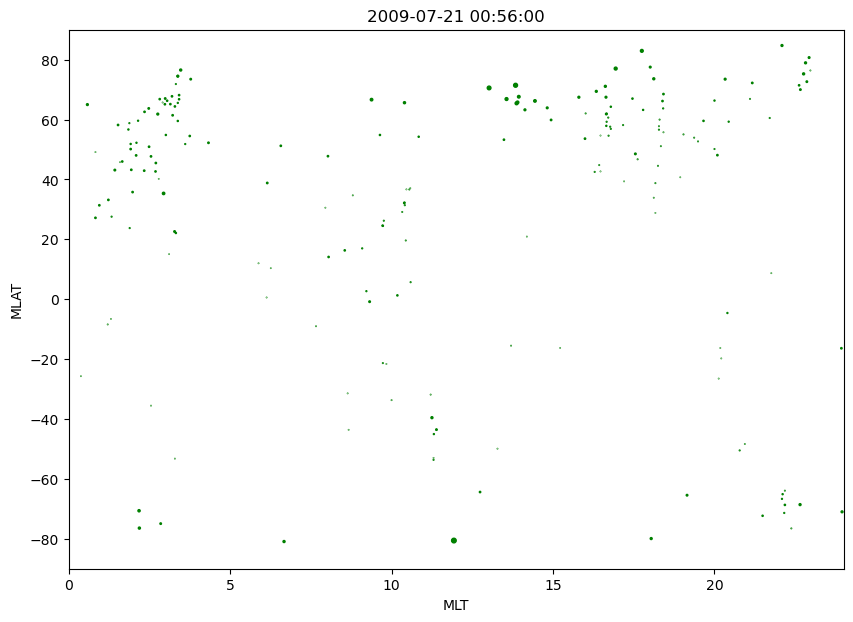

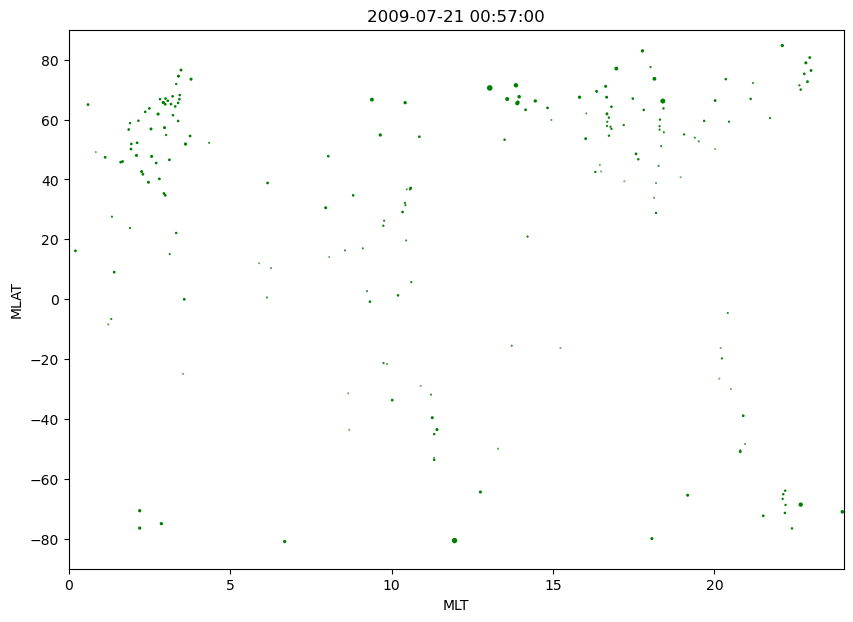

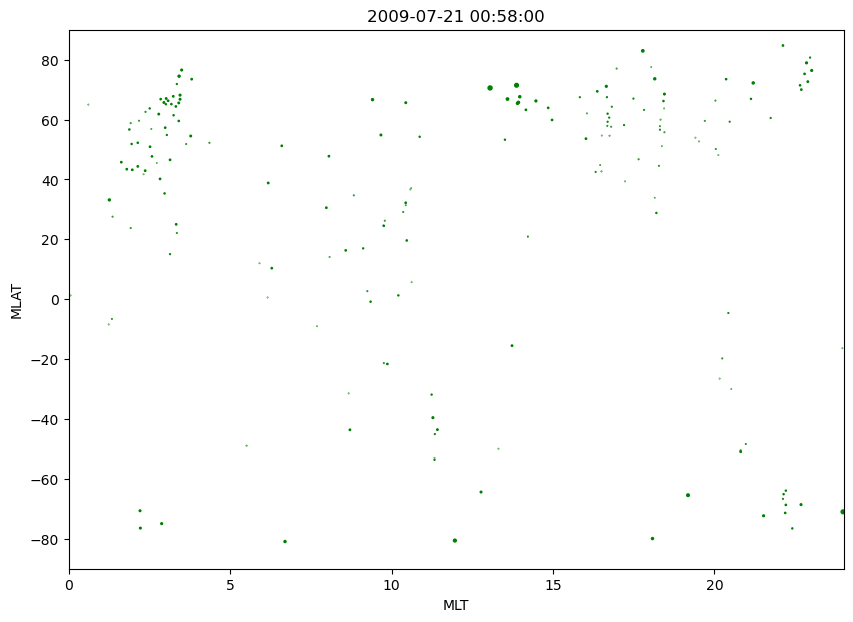

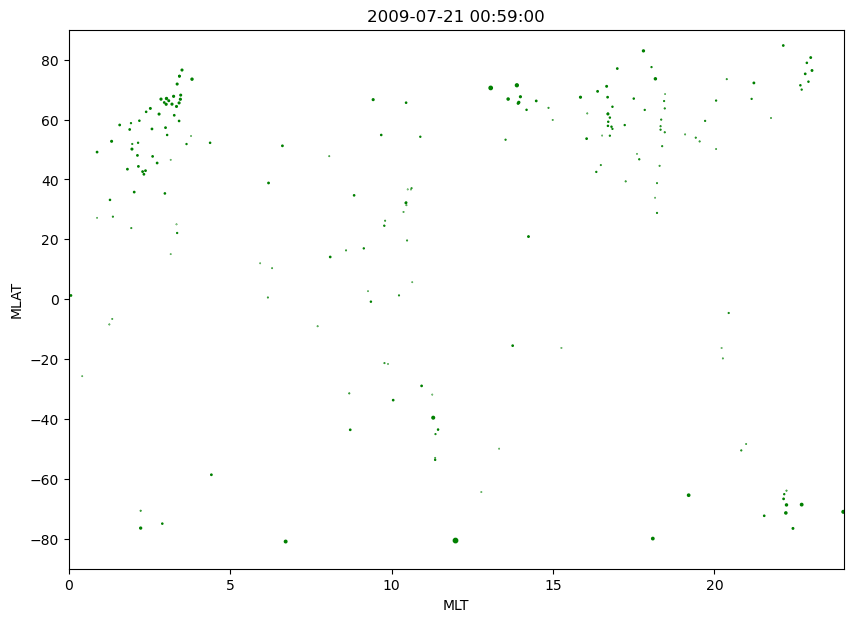

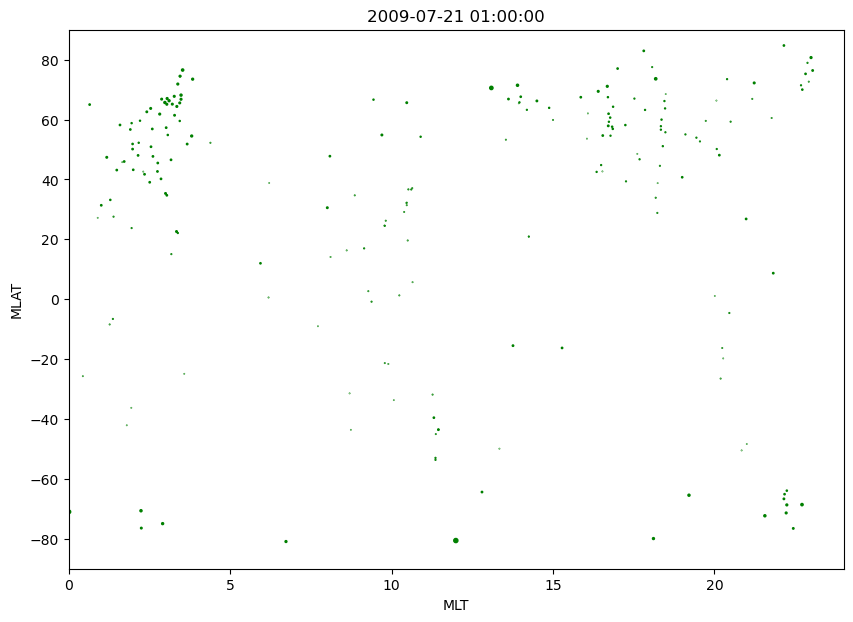